In [1]:
import pandas as pd
import scipy
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pandas.api.types import is_numeric_dtype


warnings.filterwarnings('ignore')
%matplotlib inline

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [6]:
df = pd.read_csv('./data/prep_dataset_v2.tsv', sep='\t')

In [7]:
df.shape

(246477, 73)

In [8]:
df = df.loc[:, (df != 0).any(axis=0)]
df.shape

(246477, 73)

In [11]:
df['Class'] = df['label']

In [12]:
def plot_graphics(data, col):
    fig = plt.figure(figsize=(18, 5))
    
    fig.add_subplot(1,3,1)
    sns.boxenplot(x='Class', y=col, data=data, palette=['#ff6400', '#6600ff'])
    plt.ylabel(col)
    human_confidence_interval, machine_confidence_interval = find_convidence_intervals(data, col, 200)
    human_mean_value, machine_mean_value = data[data['Class'] == 'Human'][col].mean(), data[data['Class'] == 'Machine'][col].mean()
    
#     fig=plt.figure(figsize=(8, 8))
    fig.add_subplot(1,3,2)
    sns.kdeplot(data.loc[data['Class'] == 'Human', col], label='Human', color='#ff6400')
    sns.kdeplot(data.loc[data['Class'] == 'Machine', col], label='Machine', color='#6600ff')
    plt.legend()

    plt.subplot(1,3,3)
    sns.lineplot(human_confidence_interval, np.zeros(len(human_confidence_interval)), color='#ff6400', label='Human confidence interval')
    sns.lineplot(machine_confidence_interval, np.ones(len(machine_confidence_interval)), color='#6600ff', label='Machine confidence interval')
    sns.scatterplot(human_mean_value, np.zeros(1), color='#ff6400', label='Human avg value')
    sns.lineplot([human_mean_value, human_mean_value], [0, 1], color='#ff6400')
    sns.scatterplot(machine_mean_value, np.ones(1), color='#6600ff', label='Machine avg value')
    sns.lineplot([machine_mean_value, machine_mean_value], [0, 1], color='#6600ff')
    plt.tight_layout()
    plt.show()
    
def return_stat(df, col):
    return df.groupby(["Class"])[col].agg([np.mean, np.median, np.std, np.var]).rename(columns={'mean': 'Mean', 'median': 'Median', 'std': 'Std', 'var': 'Variance'})

def ttest(df, col):
    stat, pvalue = stats.ttest_ind(df[df['Class'] == 'Machine'][col], df[df['Class'] == 'Human'][col])
    if pvalue > 0.05:
        return f'No significant difference in mean values of "{col}", P-value = {pvalue:.3f}'
    else:
        return f'Found a significant difference in the mean values of "{col}", P-value = {pvalue:.3f}'
    
def mman(df, col):
    stat, pvalue = stats.mannwhitneyu(df[df['Class'] == 'Machine'][col], df[df['Class'] == 'Human'][col])
    if pvalue > 0.05:
        return f'No significant difference in mean values of "{col}", P-value = {pvalue:.3f}'
    else:
        return f'Found a significant difference in the mean values of "{col}", P-value = {pvalue:.3f}'
    
def analyze_feature(df, col):
    plot_graphics(df, col)
    print(return_stat(df, col))
    print()
    print('T-test: ', ttest(df, col))
    print('Mann-Whitneyu: ', mman(df, col))
    c_df = df.copy()
    c_df['Class'] = c_df['Class'].map({'Human': 0, 'Machine': 1})
    print('Spearman correlation: ', round(c_df[[col] + ['Class']].corr().iloc[1, 0], 3))
    
def find_convidence_intervals(data, col, iters):
    human_intervals = []
    machine_intervals = []

    for _ in range(iters):
        human_intervals.append(find_interval(data, col, 'Human'))
        machine_intervals.append(find_interval(data, col, 'Machine'))

    human_confidence_interval = np.array(human_intervals).mean(axis=0)
    machine_confidence_interval = np.array(machine_intervals).mean(axis=0)
    return human_confidence_interval, machine_confidence_interval

def find_interval(data, col, class_):
    n = 100
    sample_data = data.loc[(data['Class'] == class_), col].sample(n)
    mean_sample_data = sample_data.mean()
    std_data = sample_data.std()
    sigma = (2.36 * std_data) / np.sqrt(n)
    return (mean_sample_data - sigma, mean_sample_data + sigma)

Интересные фичи:
1. Количество слов
2. Количество слогов
3. Ср. кол-во слов в предложении
4. Прилагательных
5. Наречий
6. Местоимений
7. Средний ранг
8. Частотность
9. Индекс ФК (мод)
10. Индекс ФК (0)
11. Родительный падеж сущ
12. Непрошедшее время ??
13. Среднее кол-во слов в предложении
14. Средняя длина слова
15. len_text
16. POS ADJF
17. POS ADVB
18. POS None

Analyze feature "Abstractness Index":


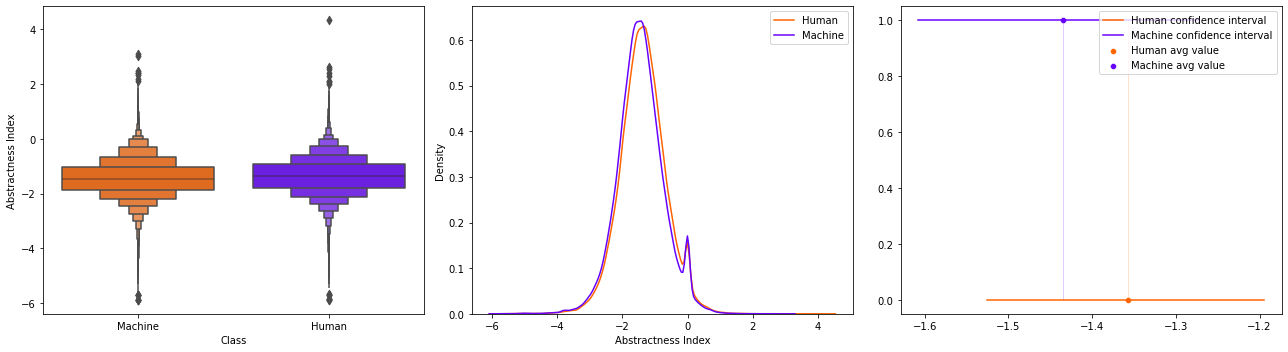

             Mean  Median       Std  Variance
Class                                        
Human   -1.357314   -1.37  0.700528  0.490740
Machine -1.434970   -1.45  0.706566  0.499236

T-test:  Found a significant difference in the mean values of "Abstractness Index", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Abstractness Index", P-value = 0.000
Spearman correlation:  -0.055
_________________________________________________________________________________________________

Analyze feature "Accusative case (Noun)":


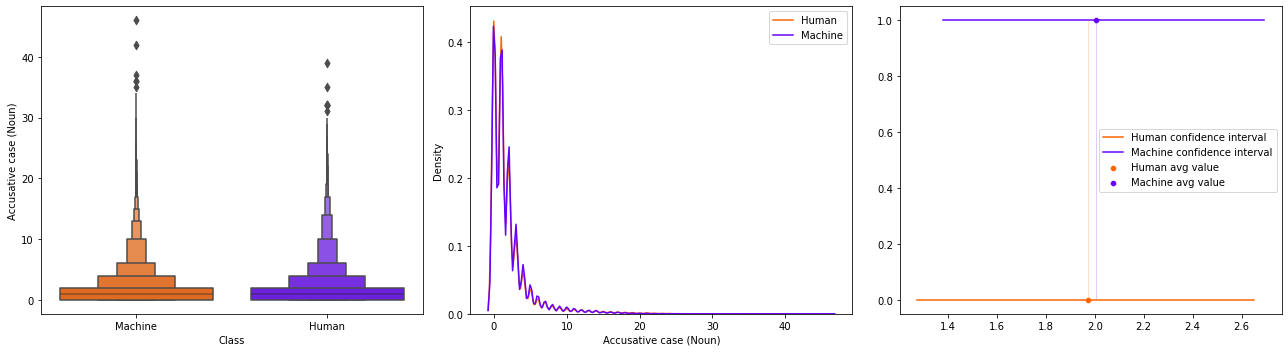

             Mean  Median       Std  Variance
Class                                        
Human    1.973636     1.0  2.991581  8.949555
Machine  2.003035     1.0  2.796156  7.818490

T-test:  Found a significant difference in the mean values of "Accusative case (Noun)", P-value = 0.012
Mann-Whitneyu:  Found a significant difference in the mean values of "Accusative case (Noun)", P-value = 0.000
Spearman correlation:  0.005
_________________________________________________________________________________________________

Analyze feature "Adverbial participle":


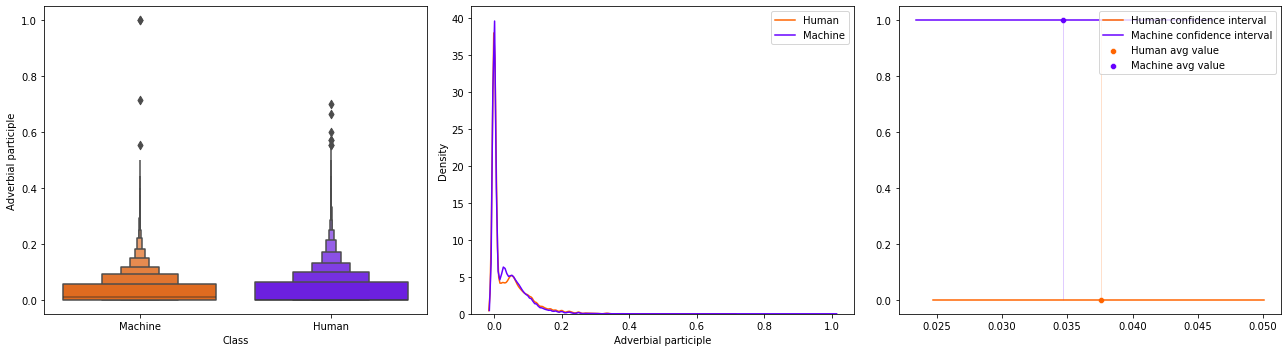

             Mean    Median       Std  Variance
Class                                          
Human    0.037622  0.000000  0.054593  0.002980
Machine  0.034666  0.011765  0.048716  0.002373

T-test:  Found a significant difference in the mean values of "Adverbial participle", P-value = 0.000
Mann-Whitneyu:  No significant difference in mean values of "Adverbial participle", P-value = 0.473
Spearman correlation:  -0.029
_________________________________________________________________________________________________

Analyze feature "Adverbs":


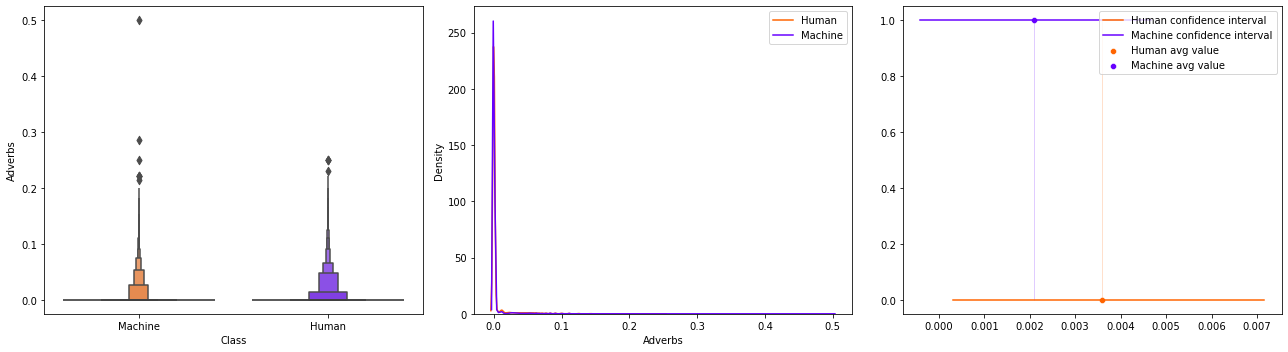

             Mean  Median       Std  Variance
Class                                        
Human    0.003591     0.0  0.015131  0.000229
Machine  0.002099     0.0  0.011625  0.000135

T-test:  Found a significant difference in the mean values of "Adverbs", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Adverbs", P-value = 0.000
Spearman correlation:  -0.055
_________________________________________________________________________________________________

Analyze feature "Average number of sentences per paragraph":


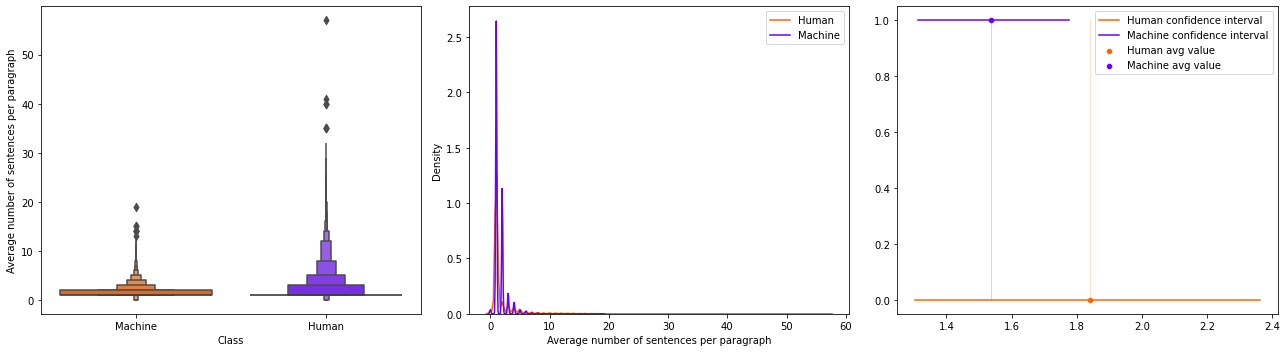

             Mean  Median      Std  Variance
Class                                       
Human    1.840649     1.0  2.34352  5.492086
Machine  1.538015     1.0  0.98051  0.961399

T-test:  Found a significant difference in the mean values of "Average number of sentences per paragraph", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Average number of sentences per paragraph", P-value = 0.000
Spearman correlation:  -0.084
_________________________________________________________________________________________________

Analyze feature "Average number of syllables in a word":


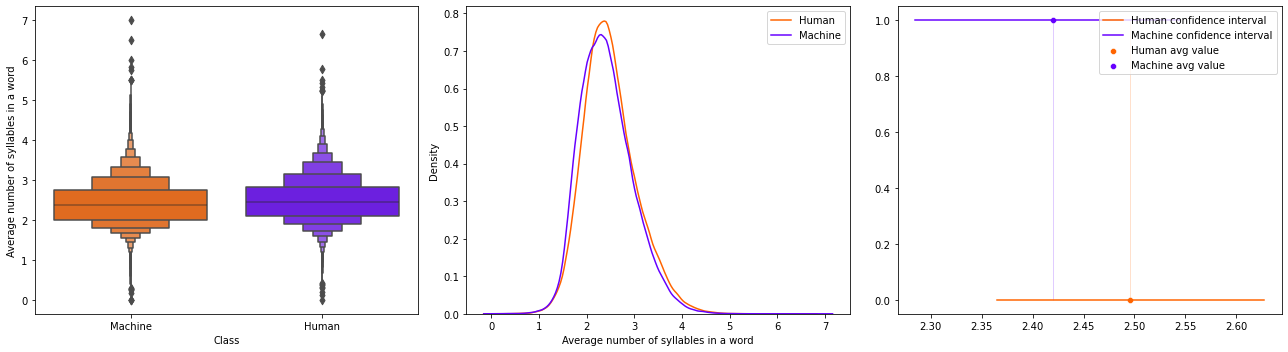

             Mean  Median       Std  Variance
Class                                        
Human    2.496043    2.44  0.561166  0.314907
Machine  2.420054    2.37  0.552899  0.305697

T-test:  Found a significant difference in the mean values of "Average number of syllables in a word", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Average number of syllables in a word", P-value = 0.000
Spearman correlation:  -0.068
_________________________________________________________________________________________________

Analyze feature "Average number of words in a sentence":


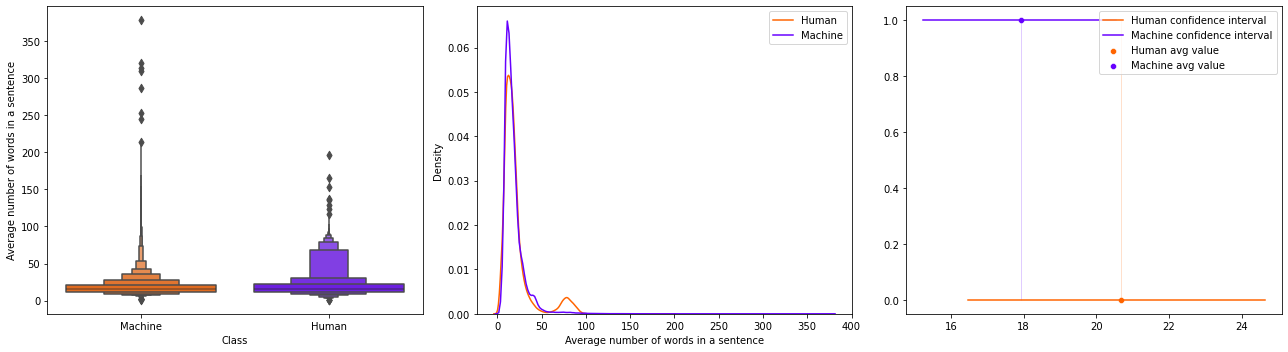

              Mean  Median        Std    Variance
Class                                            
Human    20.675676    16.0  17.634060  310.960068
Machine  17.921422    15.0  11.841622  140.224020

T-test:  Found a significant difference in the mean values of "Average number of words in a sentence", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Average number of words in a sentence", P-value = 0.000
Spearman correlation:  -0.091
_________________________________________________________________________________________________

Analyze feature "Average rank":


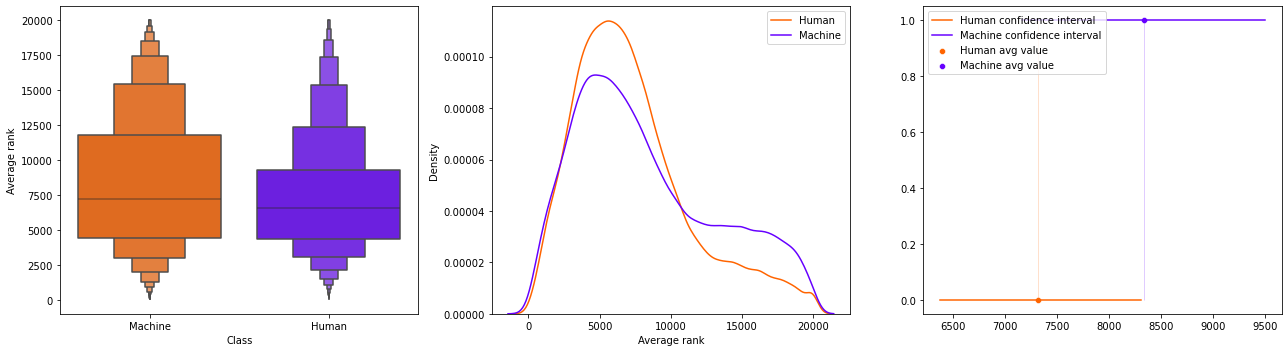

                Mean    Median          Std      Variance
Class                                                    
Human    7312.736024  6551.100  4132.262030  1.707559e+07
Machine  8329.064183  7204.825  4976.022043  2.476080e+07

T-test:  Found a significant difference in the mean values of "Average rank", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Average rank", P-value = 0.000
Spearman correlation:  0.11
_________________________________________________________________________________________________

Analyze feature "Average word length":


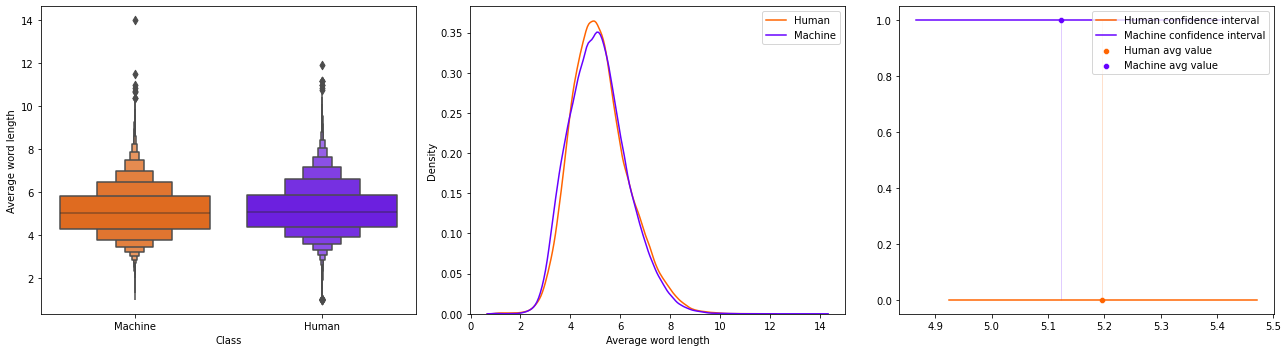

             Mean    Median       Std  Variance
Class                                          
Human    5.196078  5.076923  1.164812  1.356787
Machine  5.122746  5.054016  1.152034  1.327183

T-test:  Found a significant difference in the mean values of "Average word length", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Average word length", P-value = 0.000
Spearman correlation:  -0.032
_________________________________________________________________________________________________

Analyze feature "Average word length in the text":


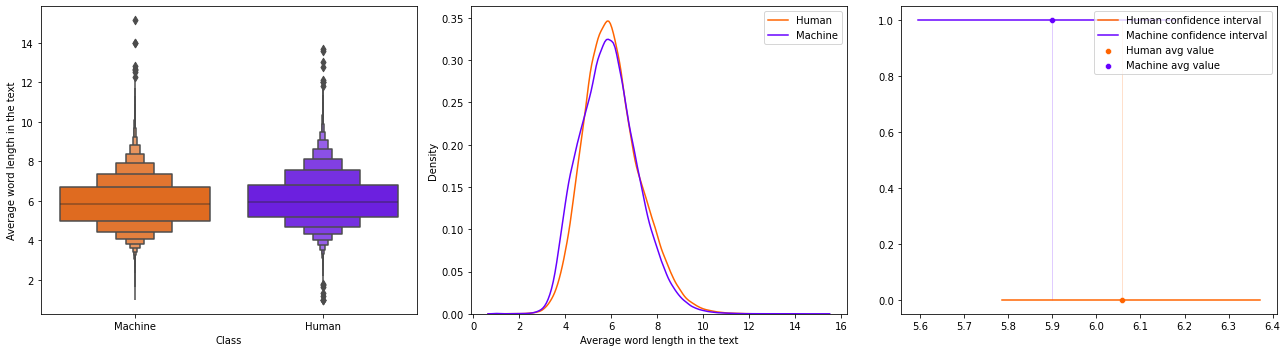

             Mean    Median       Std  Variance
Class                                          
Human    6.057642  5.937500  1.236660  1.529327
Machine  5.899608  5.846154  1.246787  1.554478

T-test:  Found a significant difference in the mean values of "Average word length in the text", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Average word length in the text", P-value = 0.000
Spearman correlation:  -0.064
_________________________________________________________________________________________________

Analyze feature "Comparative":


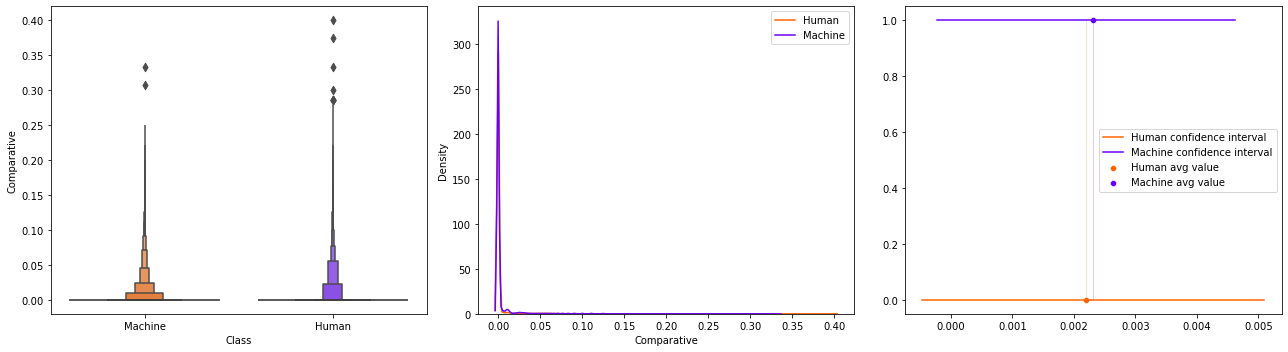

             Mean  Median       Std  Variance
Class                                        
Human    0.002200     0.0  0.012680  0.000161
Machine  0.002309     0.0  0.011592  0.000134

T-test:  Found a significant difference in the mean values of "Comparative", P-value = 0.026
Mann-Whitneyu:  Found a significant difference in the mean values of "Comparative", P-value = 0.000
Spearman correlation:  0.004
_________________________________________________________________________________________________

Analyze feature "Conjunctions":


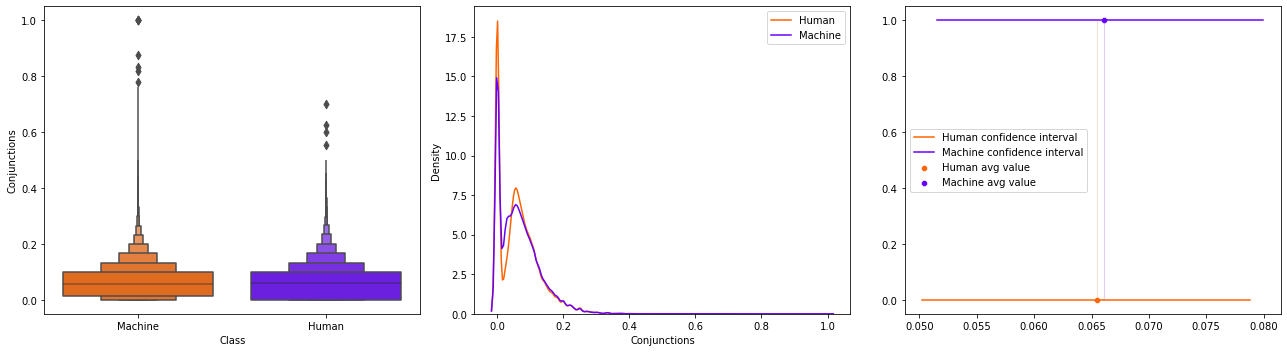

             Mean    Median       Std  Variance
Class                                          
Human    0.065503  0.058824  0.060899  0.003709
Machine  0.066100  0.056180  0.061055  0.003728

T-test:  Found a significant difference in the mean values of "Conjunctions", P-value = 0.015
Mann-Whitneyu:  Found a significant difference in the mean values of "Conjunctions", P-value = 0.001
Spearman correlation:  0.005
_________________________________________________________________________________________________

Analyze feature "Dative case (Noun)":


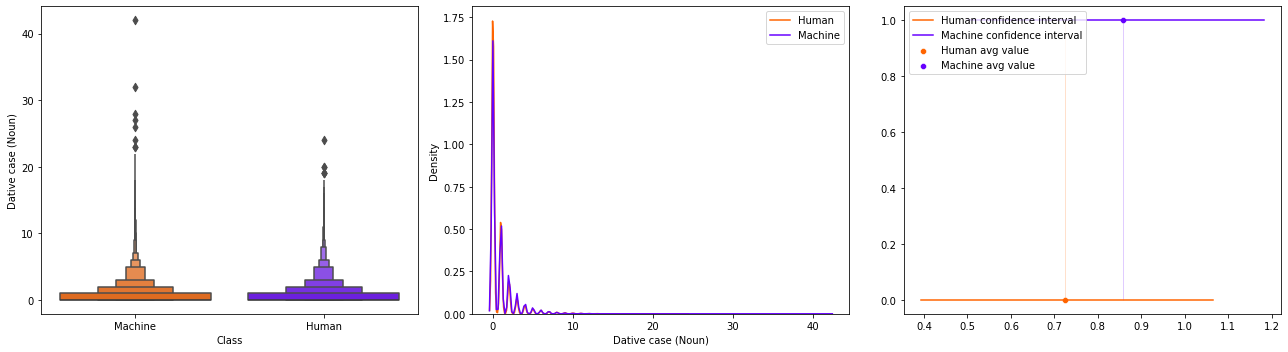

             Mean  Median       Std  Variance
Class                                        
Human    0.725318     0.0  1.468039  2.155139
Machine  0.857068     0.0  1.525446  2.326985

T-test:  Found a significant difference in the mean values of "Dative case (Noun)", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Dative case (Noun)", P-value = 0.000
Spearman correlation:  0.044
_________________________________________________________________________________________________

Analyze feature "Density of Cyrillic characters":


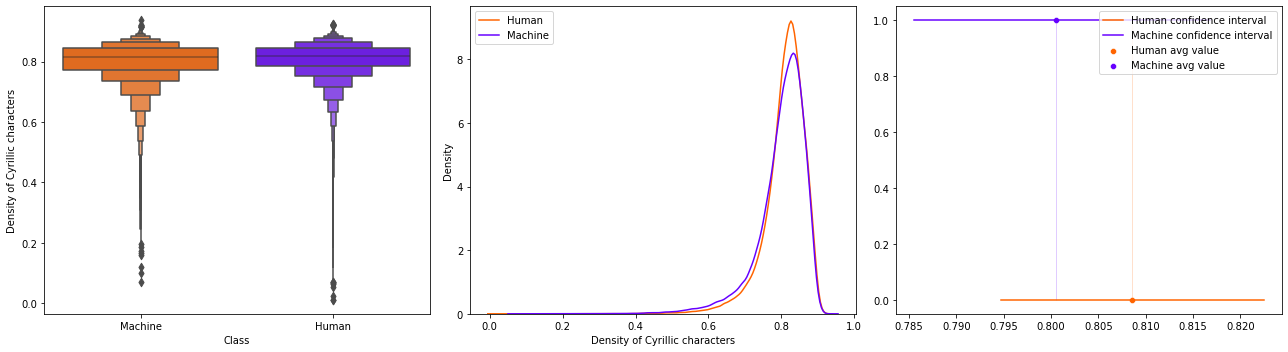

             Mean    Median       Std  Variance
Class                                          
Human    0.808521  0.818182  0.059179  0.003502
Machine  0.800509  0.814286  0.067529  0.004560

T-test:  Found a significant difference in the mean values of "Density of Cyrillic characters", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Density of Cyrillic characters", P-value = 0.000
Spearman correlation:  -0.063
_________________________________________________________________________________________________

Analyze feature "Density of Cyrillic consonants":


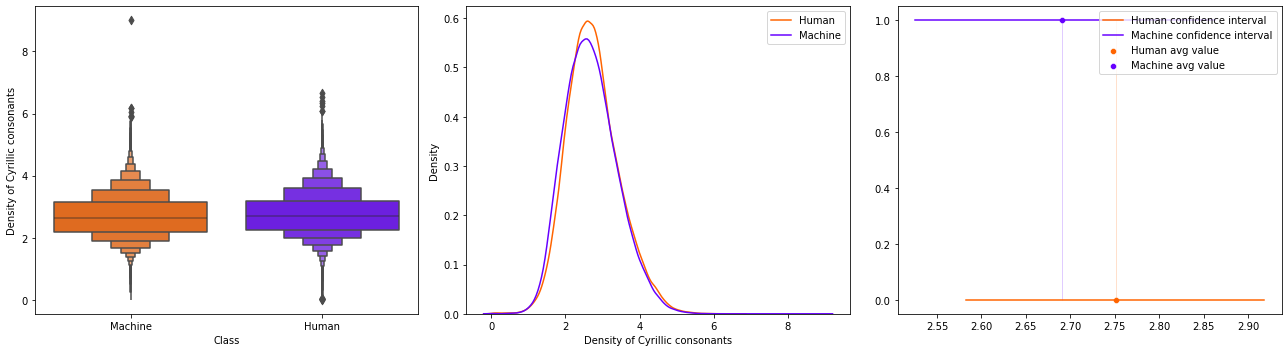

             Mean    Median       Std  Variance
Class                                          
Human    2.751948  2.695652  0.708022  0.501295
Machine  2.690946  2.638889  0.711437  0.506143

T-test:  Found a significant difference in the mean values of "Density of Cyrillic consonants", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Density of Cyrillic consonants", P-value = 0.000
Spearman correlation:  -0.043
_________________________________________________________________________________________________

Analyze feature "Density of Cyrillic vowels":


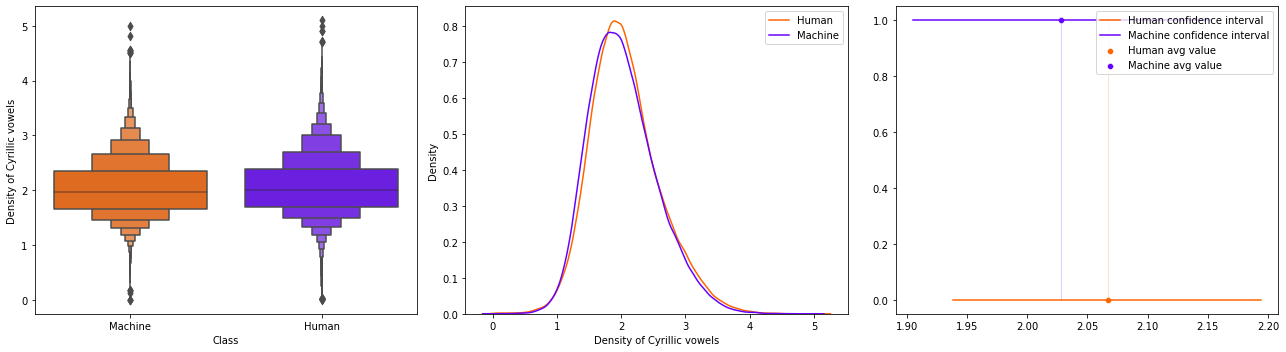

             Mean   Median       Std  Variance
Class                                         
Human    2.066885  2.00000  0.540796  0.292460
Machine  2.027739  1.97561  0.528064  0.278852

T-test:  Found a significant difference in the mean values of "Density of Cyrillic vowels", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Density of Cyrillic vowels", P-value = 0.000
Spearman correlation:  -0.037
_________________________________________________________________________________________________

Analyze feature "Density of Latin characters":


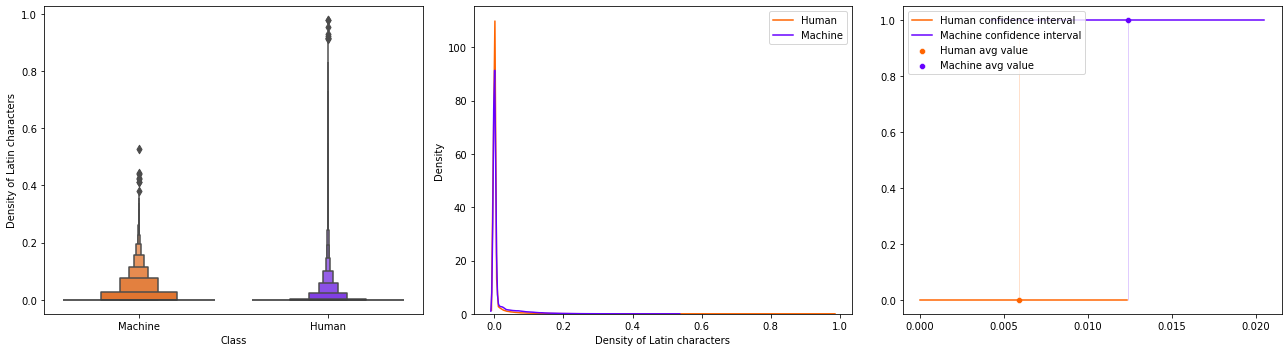

             Mean  Median       Std  Variance
Class                                        
Human    0.005913     0.0  0.029662   0.00088
Machine  0.012421     0.0  0.035772   0.00128

T-test:  Found a significant difference in the mean values of "Density of Latin characters", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Density of Latin characters", P-value = 0.000
Spearman correlation:  0.099
_________________________________________________________________________________________________

Analyze feature "Density of Latin consonants":


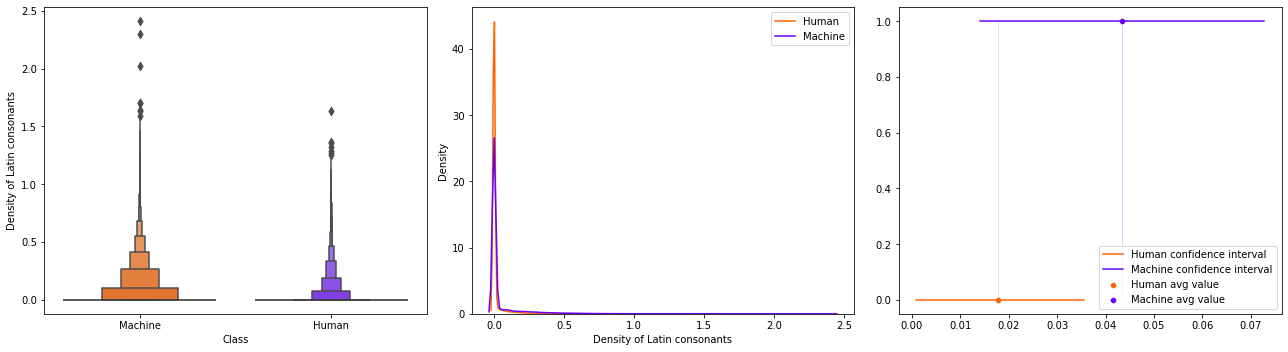

             Mean  Median       Std  Variance
Class                                        
Human    0.017765     0.0  0.077478  0.006003
Machine  0.043413     0.0  0.127343  0.016216

T-test:  Found a significant difference in the mean values of "Density of Latin consonants", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Density of Latin consonants", P-value = 0.000
Spearman correlation:  0.121
_________________________________________________________________________________________________

Analyze feature "Density of Latin vowels":


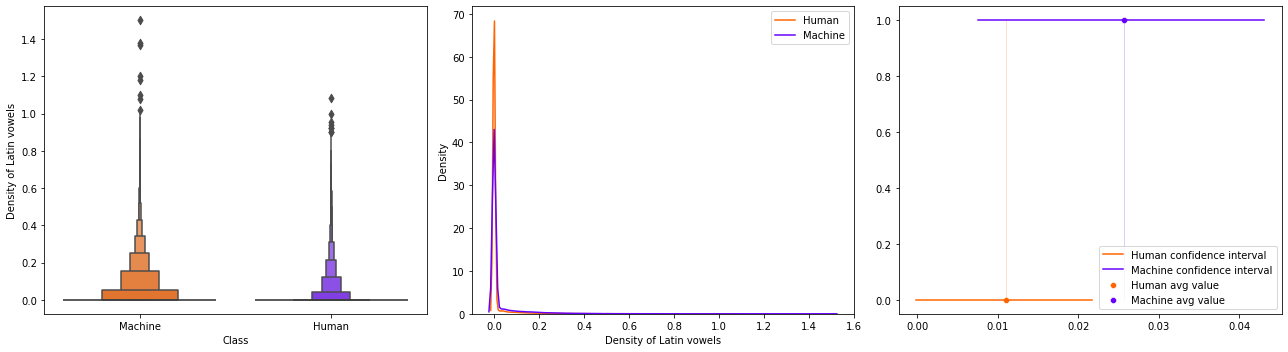

             Mean  Median       Std  Variance
Class                                        
Human    0.011076     0.0  0.051976  0.002701
Machine  0.025685     0.0  0.079319  0.006291

T-test:  Found a significant difference in the mean values of "Density of Latin vowels", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Density of Latin vowels", P-value = 0.000
Spearman correlation:  0.108
_________________________________________________________________________________________________

Analyze feature "Density of digits":


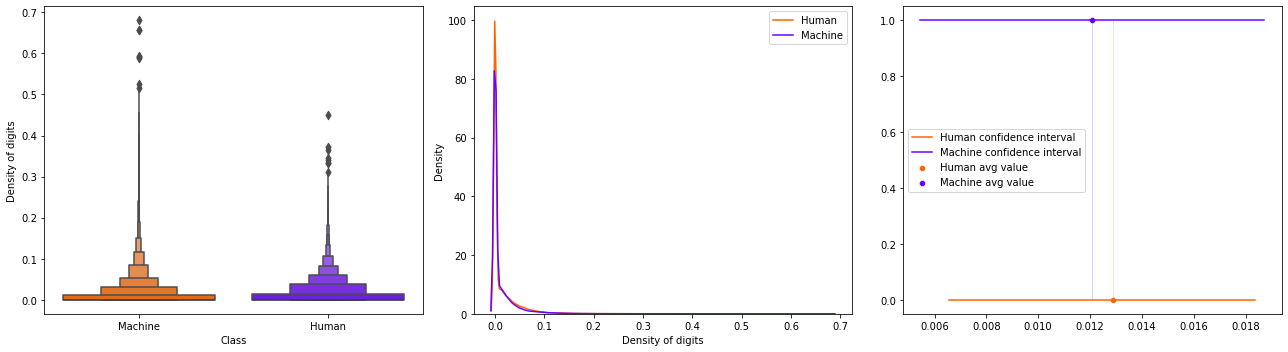

             Mean  Median       Std  Variance
Class                                        
Human    0.012888     0.0  0.026469  0.000701
Machine  0.012091     0.0  0.029351  0.000862

T-test:  Found a significant difference in the mean values of "Density of digits", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Density of digits", P-value = 0.000
Spearman correlation:  -0.014
_________________________________________________________________________________________________

Analyze feature "Density of lowercase symbols":


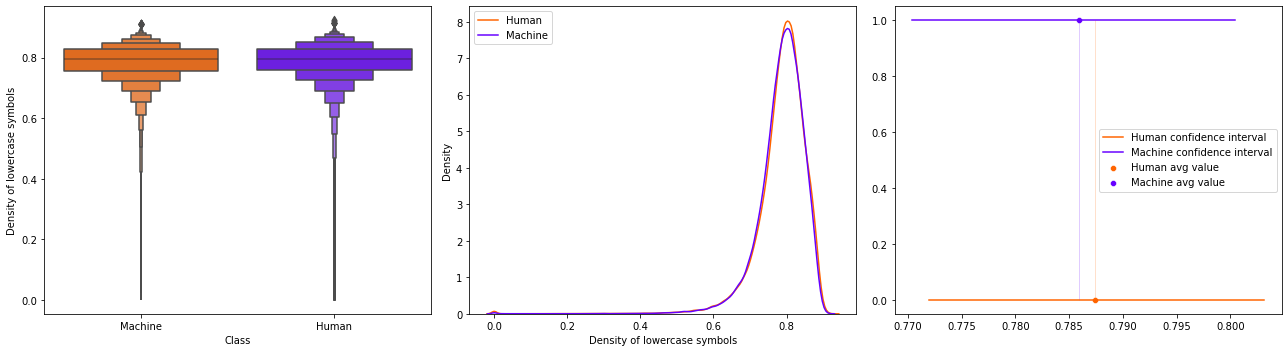

             Mean    Median       Std  Variance
Class                                          
Human    0.787434  0.796875  0.069092  0.004774
Machine  0.785904  0.794393  0.064465  0.004156

T-test:  Found a significant difference in the mean values of "Density of lowercase symbols", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Density of lowercase symbols", P-value = 0.000
Spearman correlation:  -0.011
_________________________________________________________________________________________________

Analyze feature "Density of numbers":


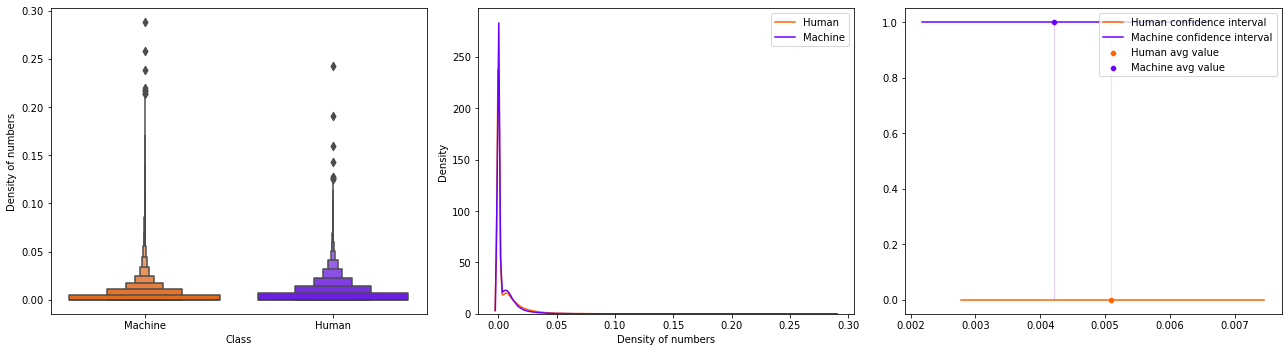

             Mean  Median       Std  Variance
Class                                        
Human    0.005097     0.0  0.010228  0.000105
Machine  0.004210     0.0  0.009206  0.000085

T-test:  Found a significant difference in the mean values of "Density of numbers", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Density of numbers", P-value = 0.000
Spearman correlation:  -0.045
_________________________________________________________________________________________________

Analyze feature "Density of punctuation symbols":


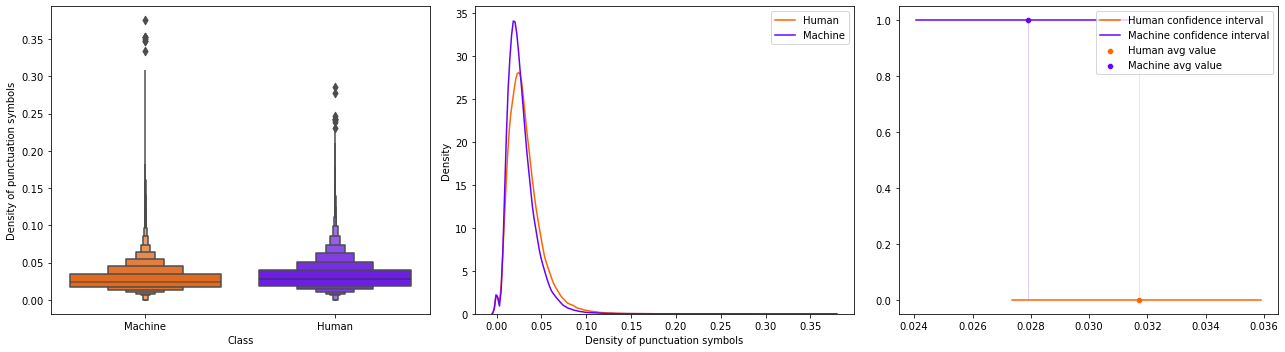

             Mean    Median       Std  Variance
Class                                          
Human    0.031725  0.028169  0.018505  0.000342
Machine  0.027891  0.024540  0.016054  0.000258

T-test:  Found a significant difference in the mean values of "Density of punctuation symbols", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Density of punctuation symbols", P-value = 0.000
Spearman correlation:  -0.11
_________________________________________________________________________________________________

Analyze feature "Density of uppercase symbols":


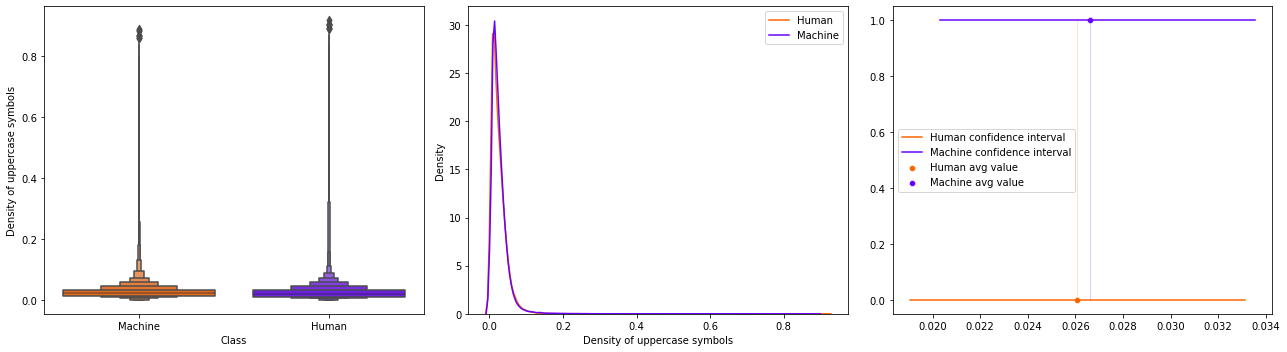

             Mean    Median       Std  Variance
Class                                          
Human    0.026081  0.019704  0.035847  0.001285
Machine  0.026616  0.020833  0.030907  0.000955

T-test:  Found a significant difference in the mean values of "Density of uppercase symbols", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Density of uppercase symbols", P-value = 0.000
Spearman correlation:  0.008
_________________________________________________________________________________________________

Analyze feature "FK index":


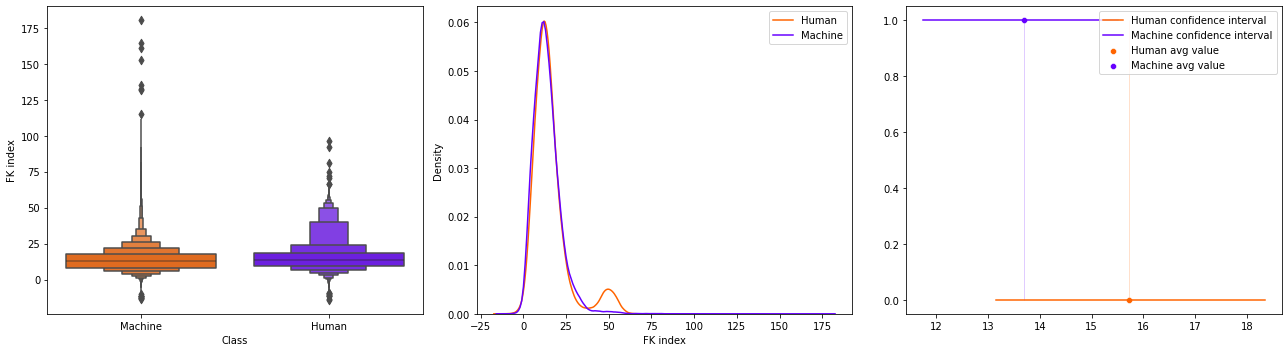

              Mean  Median        Std    Variance
Class                                            
Human    15.714717   13.44  10.995909  120.910023
Machine  13.699296   12.68   8.033042   64.529766

T-test:  Found a significant difference in the mean values of "FK index", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "FK index", P-value = 0.000
Spearman correlation:  -0.104
_________________________________________________________________________________________________

Analyze feature "FK index SIS":


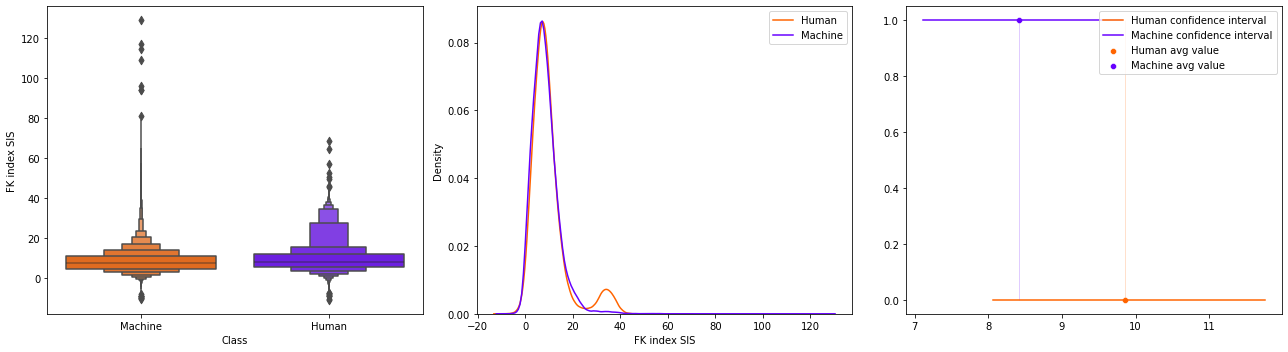

             Mean  Median       Std   Variance
Class                                         
Human    9.850466    8.21  7.816130  61.091886
Machine  8.421257    7.70  5.676058  32.217635

T-test:  Found a significant difference in the mean values of "FK index SIS", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "FK index SIS", P-value = 0.000
Spearman correlation:  -0.104
_________________________________________________________________________________________________

Analyze feature "Frequency (according to Sharov's dictionary)":


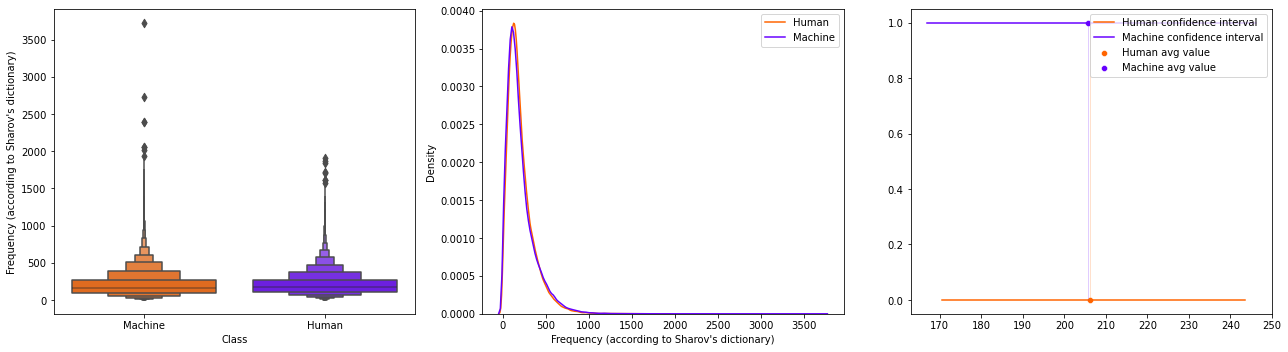

               Mean  Median         Std      Variance
Class                                                
Human    206.267044  167.77  154.011992  23719.693816
Machine  205.780782  160.10  168.539068  28405.417507

T-test:  No significant difference in mean values of "Frequency (according to Sharov's dictionary)", P-value = 0.455
Mann-Whitneyu:  Found a significant difference in the mean values of "Frequency (according to Sharov's dictionary)", P-value = 0.000
Spearman correlation:  -0.002
_________________________________________________________________________________________________

Analyze feature "Full adjectives":


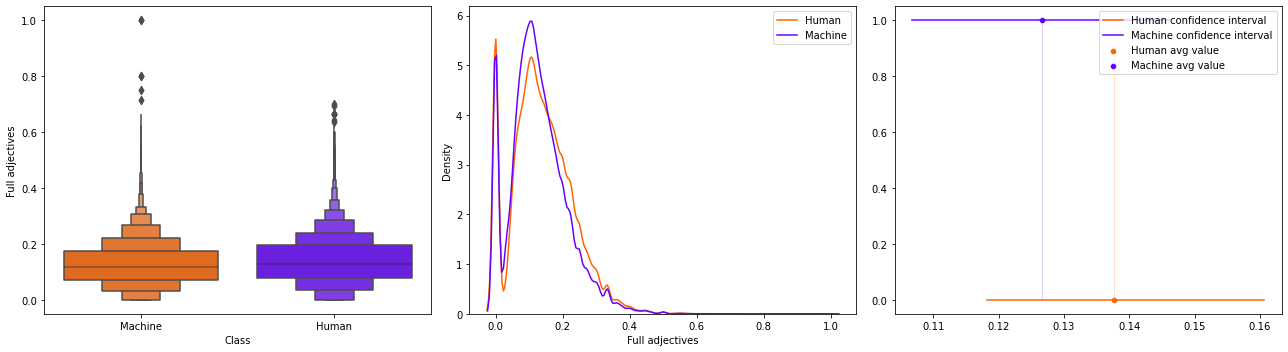

             Mean    Median       Std  Variance
Class                                          
Human    0.137711  0.129032  0.089198  0.007956
Machine  0.126584  0.117647  0.083152  0.006914

T-test:  Found a significant difference in the mean values of "Full adjectives", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Full adjectives", P-value = 0.000
Spearman correlation:  -0.064
_________________________________________________________________________________________________

Analyze feature "Full participles":


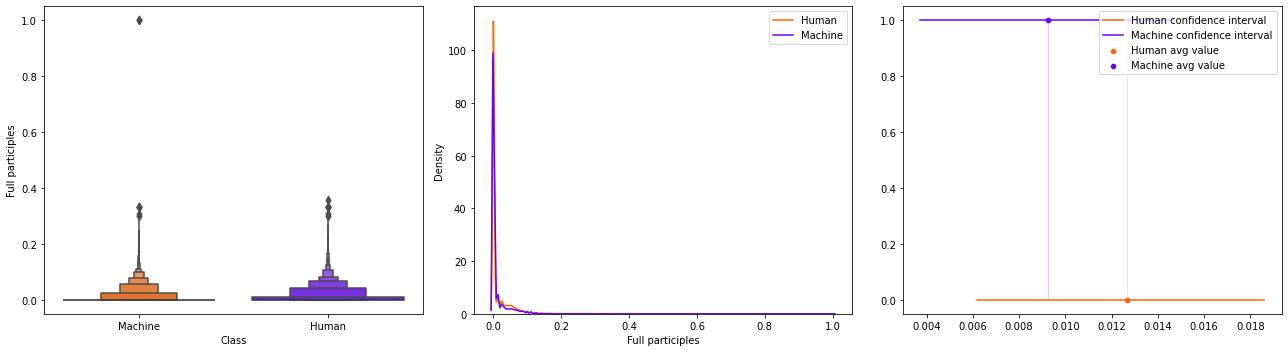

             Mean  Median       Std  Variance
Class                                        
Human    0.012645     0.0  0.026896  0.000723
Machine  0.009250     0.0  0.023824  0.000568

T-test:  Found a significant difference in the mean values of "Full participles", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Full participles", P-value = 0.000
Spearman correlation:  -0.067
_________________________________________________________________________________________________

Analyze feature "Future time":


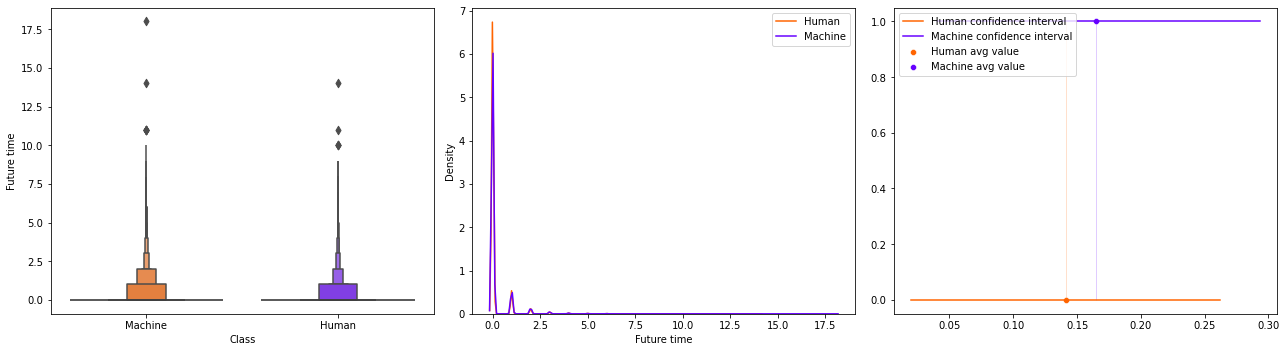

            Mean  Median       Std  Variance
Class                                       
Human    0.14137     0.0  0.542858  0.294695
Machine  0.16450     0.0  0.562186  0.316053

T-test:  Found a significant difference in the mean values of "Future time", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Future time", P-value = 0.000
Spearman correlation:  0.021
_________________________________________________________________________________________________

Analyze feature "Genitive case (Noun)":


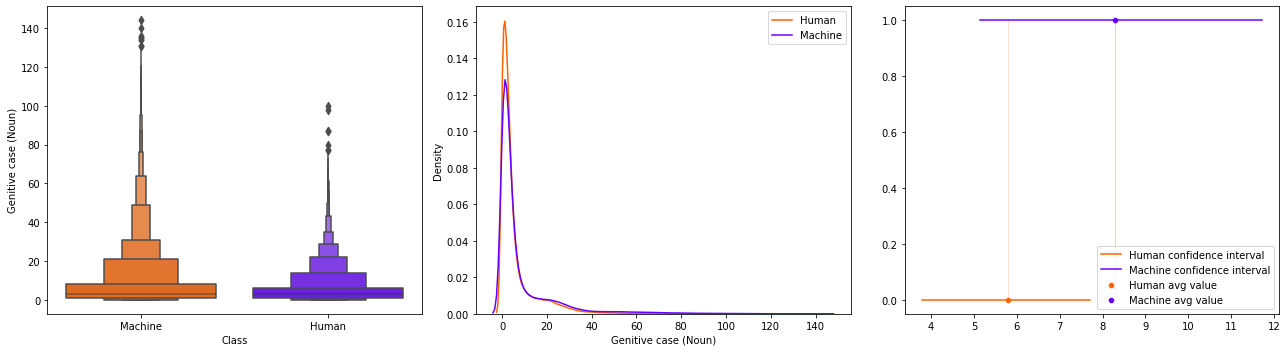

             Mean  Median        Std    Variance
Class                                           
Human    5.782460     3.0   8.538854   72.912030
Machine  8.290896     3.0  14.120330  199.383729

T-test:  Found a significant difference in the mean values of "Genitive case (Noun)", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Genitive case (Noun)", P-value = 0.000
Spearman correlation:  0.107
_________________________________________________________________________________________________

Analyze feature "Global argument overlap":


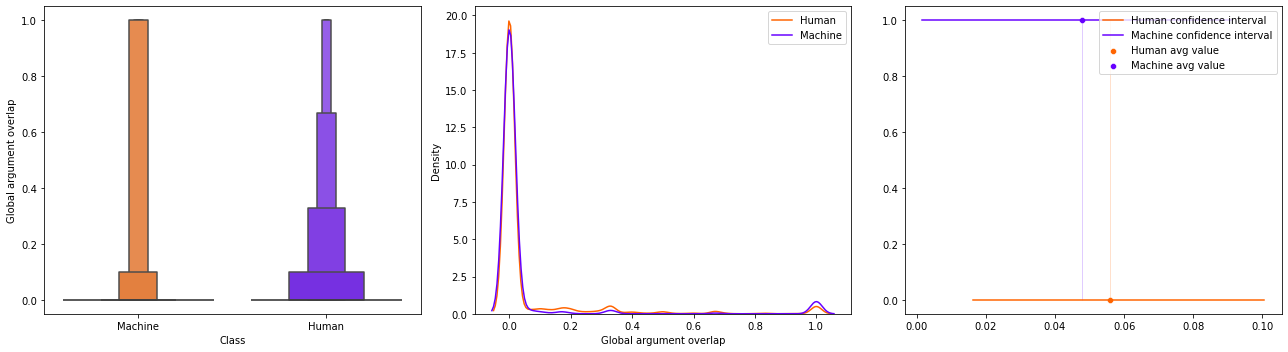

             Mean  Median       Std  Variance
Class                                        
Human    0.056041     0.0  0.179662  0.032278
Machine  0.047678     0.0  0.199238  0.039696

T-test:  Found a significant difference in the mean values of "Global argument overlap", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Global argument overlap", P-value = 0.000
Spearman correlation:  -0.022
_________________________________________________________________________________________________

Analyze feature "Global noun overlap":


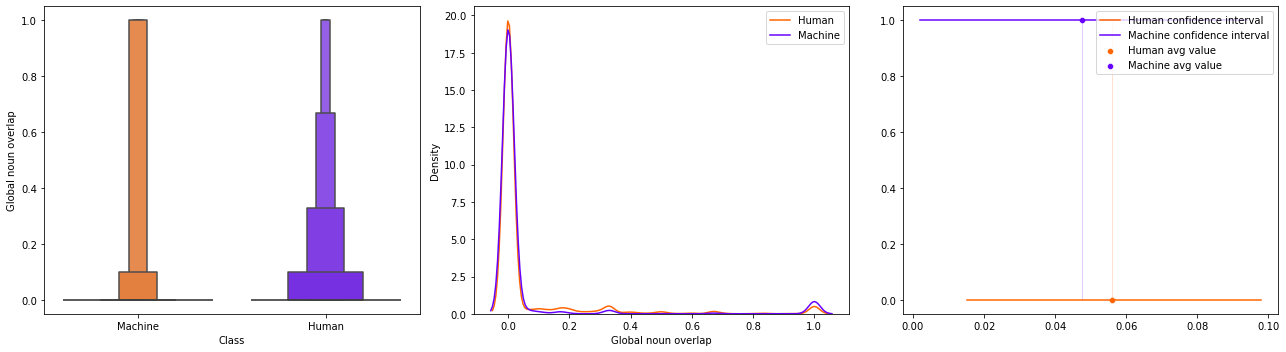

             Mean  Median       Std  Variance
Class                                        
Human    0.056041     0.0  0.179662  0.032278
Machine  0.047678     0.0  0.199238  0.039696

T-test:  Found a significant difference in the mean values of "Global noun overlap", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Global noun overlap", P-value = 0.000
Spearman correlation:  -0.022
_________________________________________________________________________________________________

Analyze feature "Infinitives":


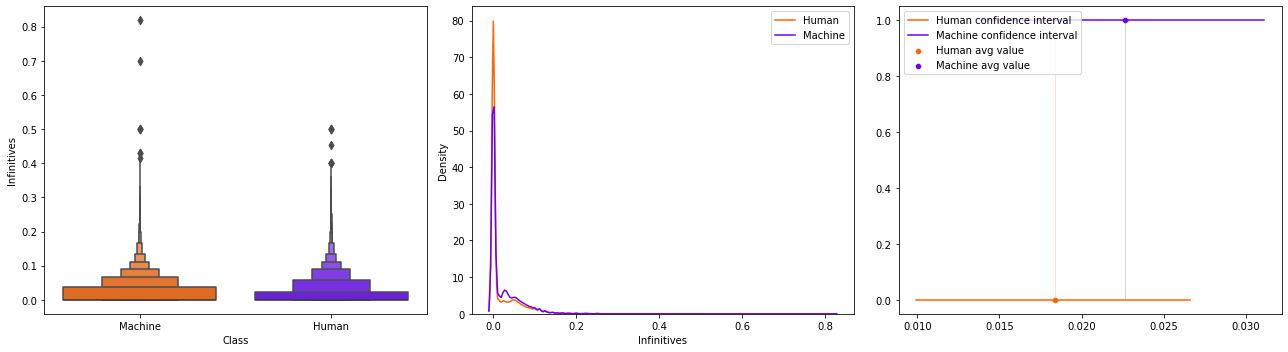

             Mean  Median       Std  Variance
Class                                        
Human    0.018355     0.0  0.036010  0.001297
Machine  0.022642     0.0  0.036923  0.001363

T-test:  Found a significant difference in the mean values of "Infinitives", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Infinitives", P-value = 0.000
Spearman correlation:  0.059
_________________________________________________________________________________________________

Analyze feature "Instrumental case (Noun)":


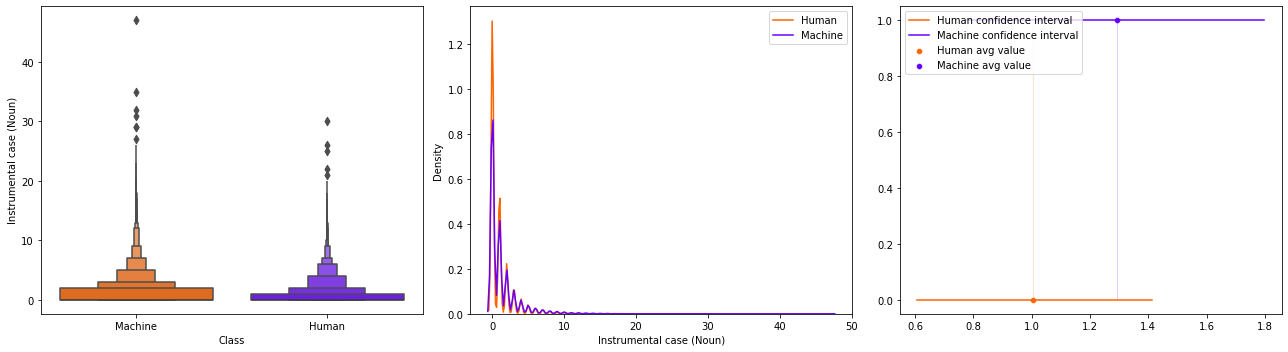

             Mean  Median       Std  Variance
Class                                        
Human    1.003051     0.0  1.735811  3.013039
Machine  1.292072     0.0  2.208487  4.877416

T-test:  Found a significant difference in the mean values of "Instrumental case (Noun)", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Instrumental case (Noun)", P-value = 0.000
Spearman correlation:  0.073
_________________________________________________________________________________________________

Analyze feature "Interjections":


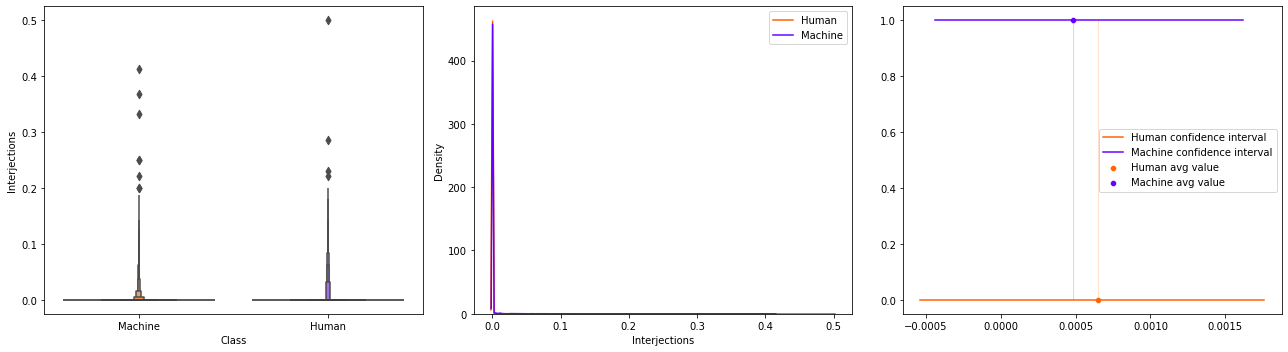

             Mean  Median       Std  Variance
Class                                        
Human    0.000650     0.0  0.007277  0.000053
Machine  0.000479     0.0  0.005482  0.000030

T-test:  Found a significant difference in the mean values of "Interjections", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Interjections", P-value = 0.000
Spearman correlation:  -0.013
_________________________________________________________________________________________________

Analyze feature "Local argument overlap":


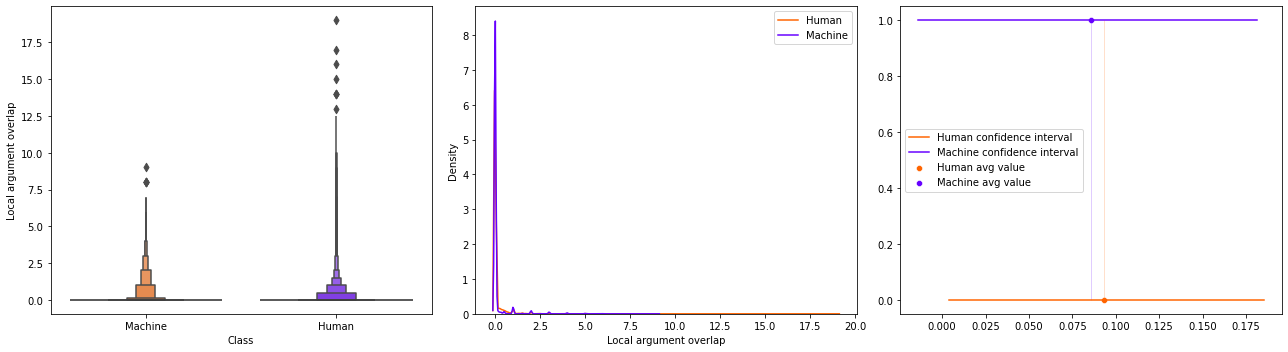

             Mean  Median       Std  Variance
Class                                        
Human    0.093088     0.0  0.442297  0.195626
Machine  0.085778     0.0  0.445025  0.198047

T-test:  Found a significant difference in the mean values of "Local argument overlap", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Local argument overlap", P-value = 0.000
Spearman correlation:  -0.008
_________________________________________________________________________________________________

Analyze feature "Local noun overlap":


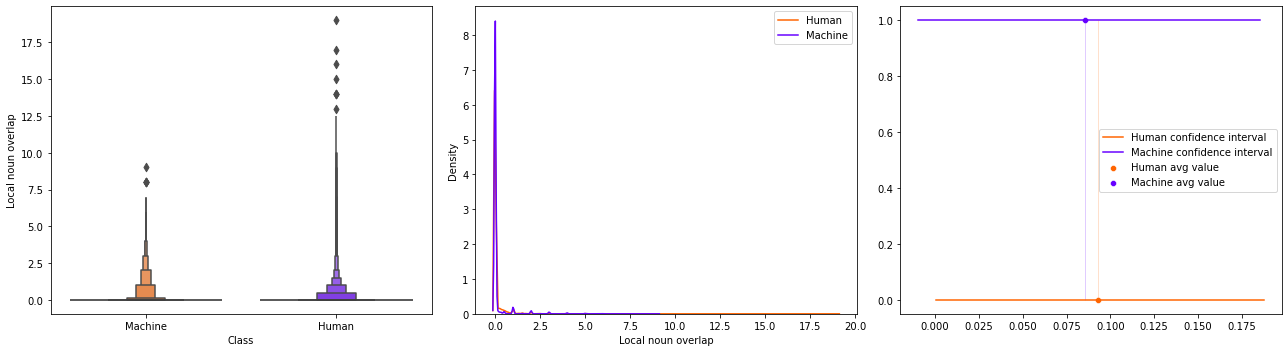

             Mean  Median       Std  Variance
Class                                        
Human    0.093088     0.0  0.442297  0.195626
Machine  0.085778     0.0  0.445025  0.198047

T-test:  Found a significant difference in the mean values of "Local noun overlap", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Local noun overlap", P-value = 0.000
Spearman correlation:  -0.008
_________________________________________________________________________________________________

Analyze feature "Nominative case (Noun)":


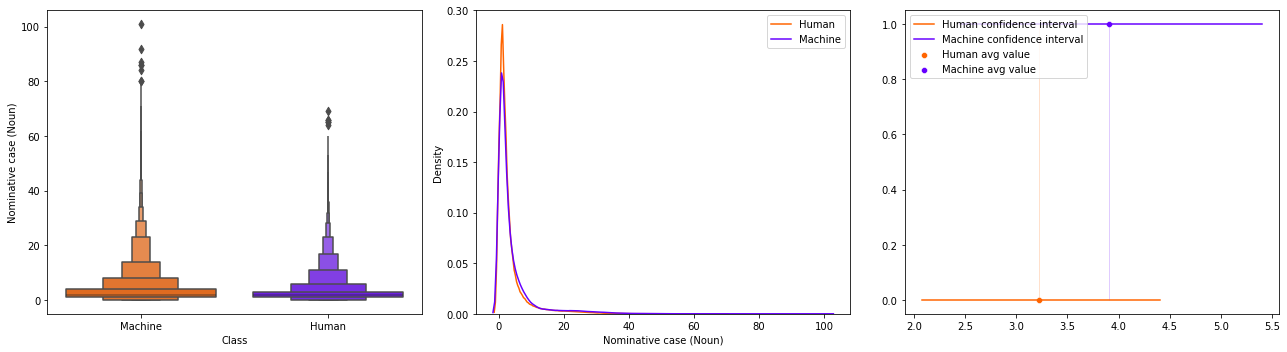

             Mean  Median       Std   Variance
Class                                         
Human    3.219877     2.0  4.959827  24.599881
Machine  3.902126     2.0  6.291945  39.588567

T-test:  Found a significant difference in the mean values of "Nominative case (Noun)", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Nominative case (Noun)", P-value = 0.000
Spearman correlation:  0.06
_________________________________________________________________________________________________

Analyze feature "Nouns":


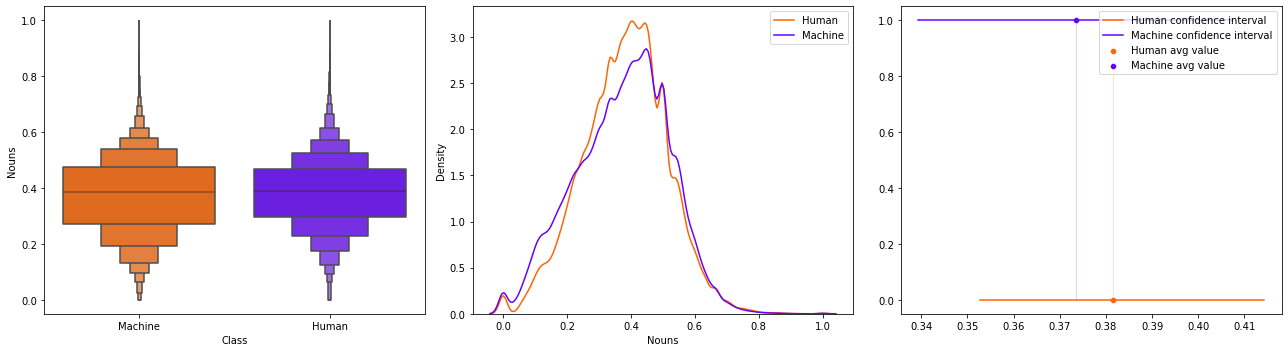

             Mean    Median      Std  Variance
Class                                         
Human    0.381615  0.388235  0.13076  0.017098
Machine  0.373567  0.384615  0.14456  0.020898

T-test:  Found a significant difference in the mean values of "Nouns", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Nouns", P-value = 0.000
Spearman correlation:  -0.029
_________________________________________________________________________________________________

Analyze feature "Number of legal terms":


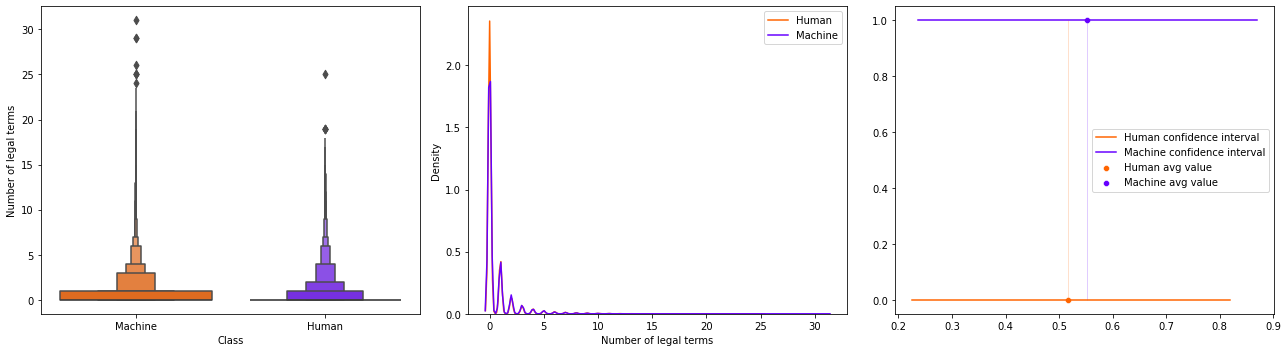

             Mean  Median       Std  Variance
Class                                        
Human    0.516687     0.0  1.330746  1.770886
Machine  0.552848     0.0  1.399059  1.957366

T-test:  Found a significant difference in the mean values of "Number of legal terms", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Number of legal terms", P-value = 0.000
Spearman correlation:  0.013
_________________________________________________________________________________________________

Analyze feature "Number of paragraphs":


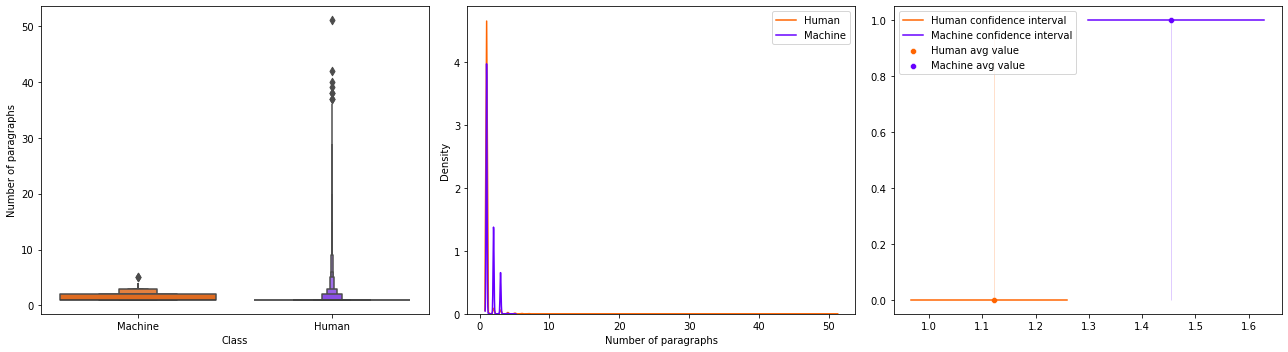

             Mean  Median       Std  Variance
Class                                        
Human    1.122098     1.0  0.845759  0.715309
Machine  1.453919     1.0  0.690777  0.477173

T-test:  Found a significant difference in the mean values of "Number of paragraphs", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Number of paragraphs", P-value = 0.000
Spearman correlation:  0.21
_________________________________________________________________________________________________

Analyze feature "Number of proposals":


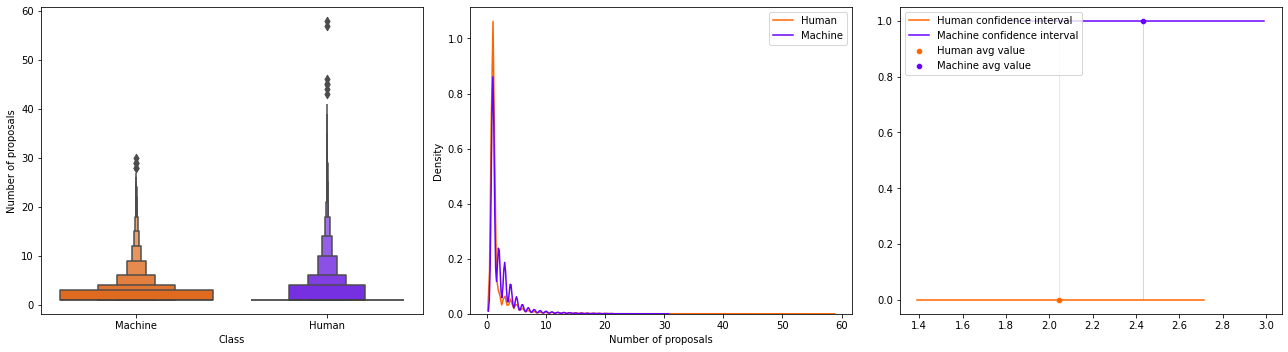

             Mean  Median       Std  Variance
Class                                        
Human    2.043899     1.0  2.960639  8.765381
Machine  2.433236     1.0  2.602962  6.775409

T-test:  Found a significant difference in the mean values of "Number of proposals", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Number of proposals", P-value = 0.000
Spearman correlation:  0.07
_________________________________________________________________________________________________

Analyze feature "Number of syllables":


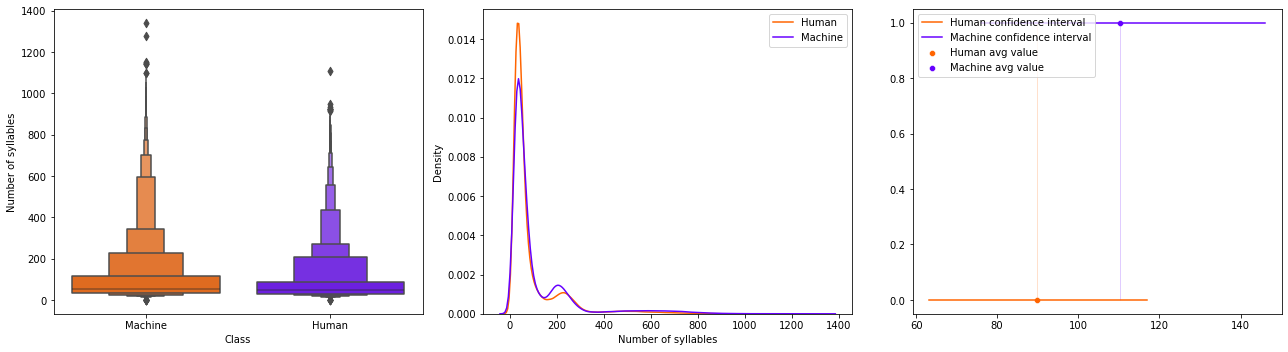

               Mean  Median        Std      Variance
Class                                               
Human     89.817035    46.0  115.72567  13392.430739
Machine  110.360581    52.0  148.05459  21920.161706

T-test:  Found a significant difference in the mean values of "Number of syllables", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Number of syllables", P-value = 0.000
Spearman correlation:  0.077
_________________________________________________________________________________________________

Analyze feature "Number of words":


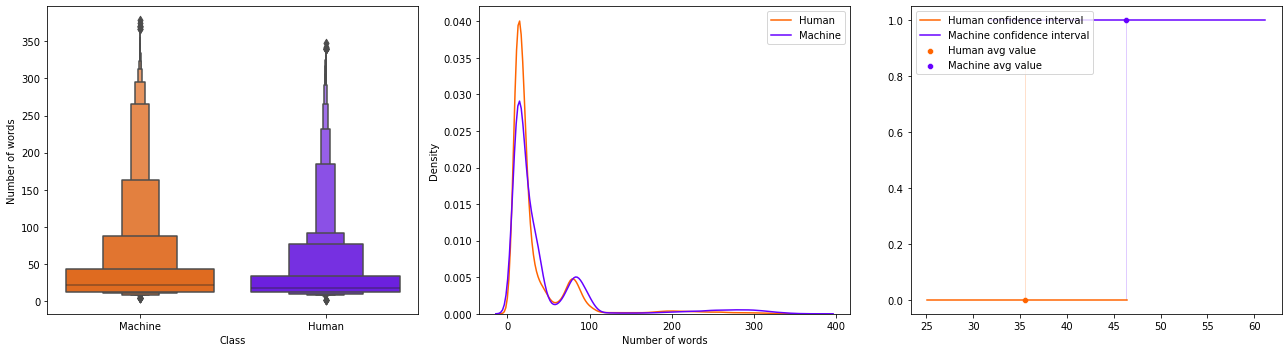

              Mean  Median        Std     Variance
Class                                             
Human    35.566802    18.0  45.872672  2104.302033
Machine  46.342202    22.0  62.671444  3927.709924

T-test:  Found a significant difference in the mean values of "Number of words", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Number of words", P-value = 0.000
Spearman correlation:  0.098
_________________________________________________________________________________________________

Analyze feature "Numerals":


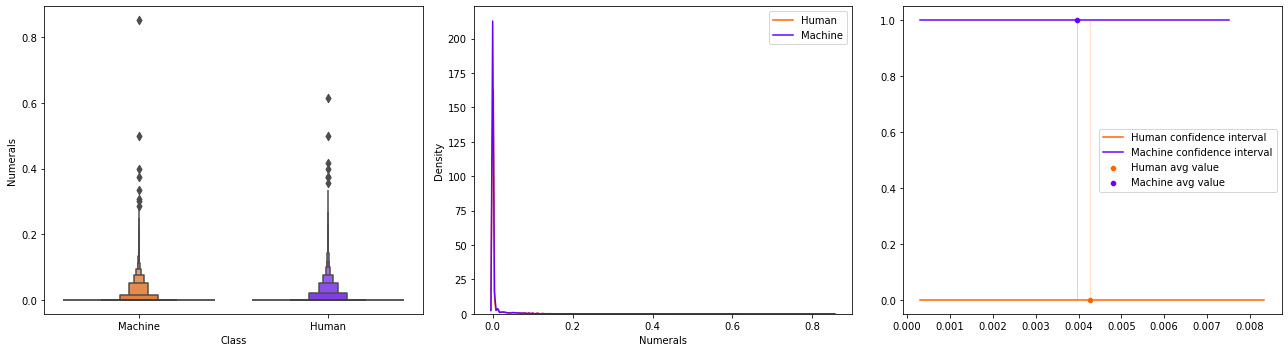

             Mean  Median       Std  Variance
Class                                        
Human    0.004273     0.0  0.017559  0.000308
Machine  0.003953     0.0  0.016724  0.000280

T-test:  Found a significant difference in the mean values of "Numerals", P-value = 0.000
Mann-Whitneyu:  No significant difference in mean values of "Numerals", P-value = 0.246
Spearman correlation:  -0.009
_________________________________________________________________________________________________

Analyze feature "Particles":


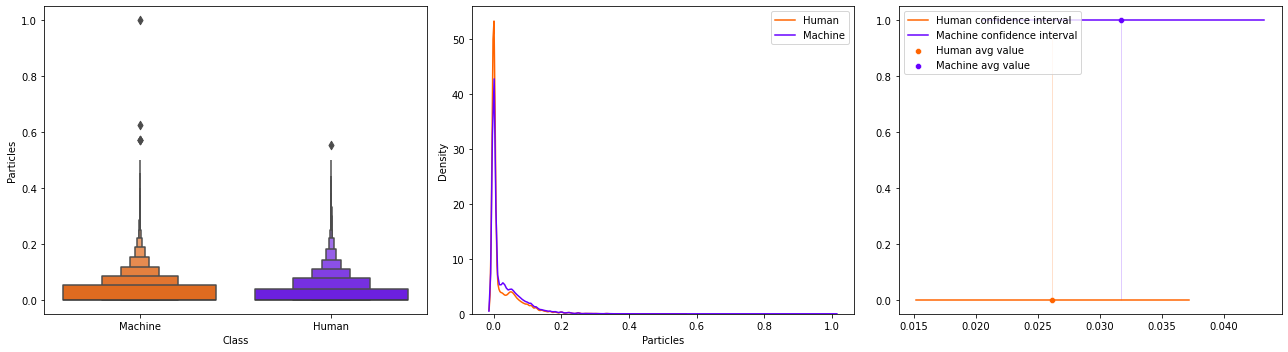

             Mean  Median       Std  Variance
Class                                        
Human    0.026143     0.0  0.047210  0.002229
Machine  0.031700     0.0  0.048639  0.002366

T-test:  Found a significant difference in the mean values of "Particles", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Particles", P-value = 0.000
Spearman correlation:  0.058
_________________________________________________________________________________________________

Analyze feature "Past time":


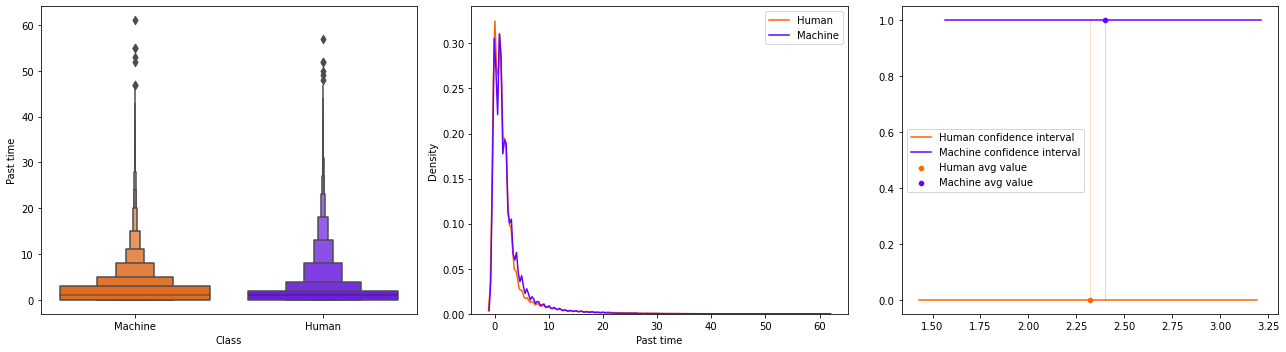

             Mean  Median       Std   Variance
Class                                         
Human    2.322492     1.0  3.941764  15.537507
Machine  2.399497     1.0  3.572273  12.761132

T-test:  Found a significant difference in the mean values of "Past time", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Past time", P-value = 0.000
Spearman correlation:  0.01
_________________________________________________________________________________________________

Analyze feature "Predicatives":


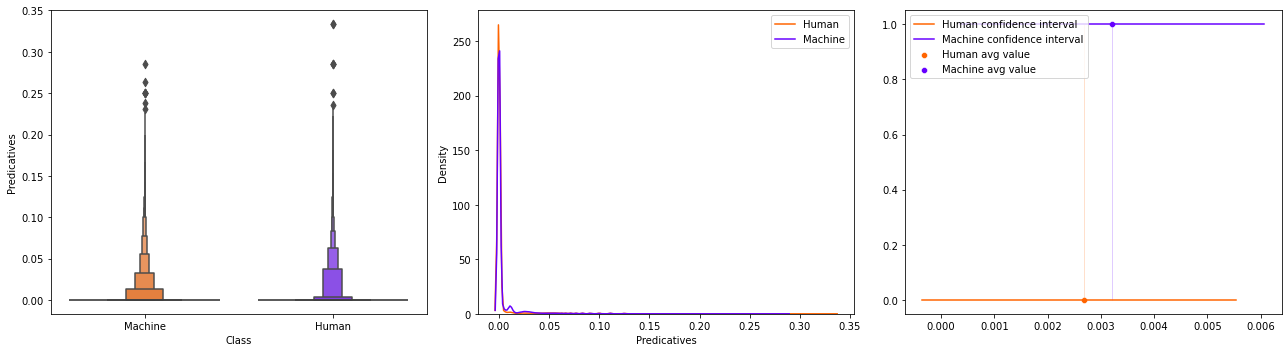

             Mean  Median       Std  Variance
Class                                        
Human    0.002683     0.0  0.013664  0.000187
Machine  0.003217     0.0  0.012905  0.000167

T-test:  Found a significant difference in the mean values of "Predicatives", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Predicatives", P-value = 0.000
Spearman correlation:  0.02
_________________________________________________________________________________________________

Analyze feature "Prepositional case (Noun)":


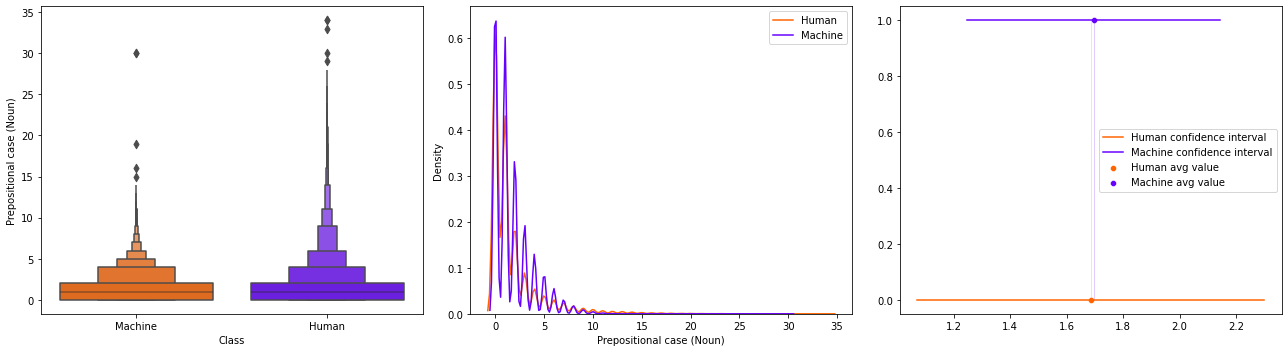

             Mean  Median       Std  Variance
Class                                        
Human    1.685127     1.0  2.683424  7.200767
Machine  1.697371     1.0  1.915996  3.671039

T-test:  No significant difference in mean values of "Prepositional case (Noun)", P-value = 0.192
Mann-Whitneyu:  Found a significant difference in the mean values of "Prepositional case (Noun)", P-value = 0.000
Spearman correlation:  0.003
_________________________________________________________________________________________________

Analyze feature "Prepositions":


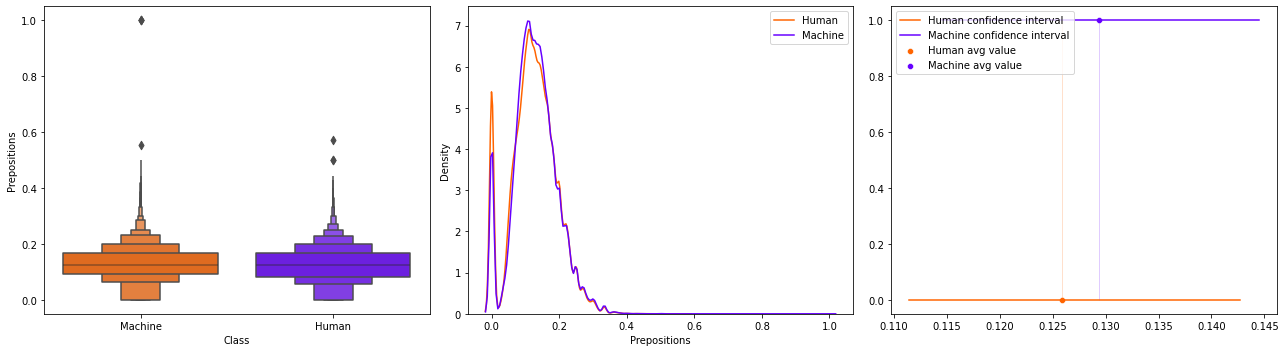

             Mean  Median       Std  Variance
Class                                        
Human    0.125889   0.125  0.066259  0.004390
Machine  0.129391   0.125  0.064000  0.004096

T-test:  Found a significant difference in the mean values of "Prepositions", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Prepositions", P-value = 0.000
Spearman correlation:  0.027
_________________________________________________________________________________________________

Analyze feature "Present time":


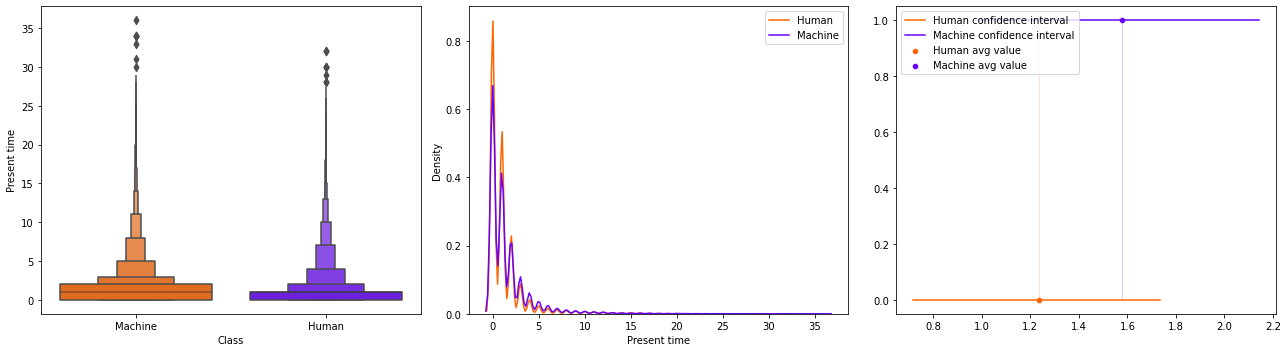

             Mean  Median       Std  Variance
Class                                        
Human    1.236682     1.0  2.222411  4.939112
Machine  1.577353     1.0  2.577591  6.643973

T-test:  Found a significant difference in the mean values of "Present time", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Present time", P-value = 0.000
Spearman correlation:  0.071
_________________________________________________________________________________________________

Analyze feature "Pronouns":


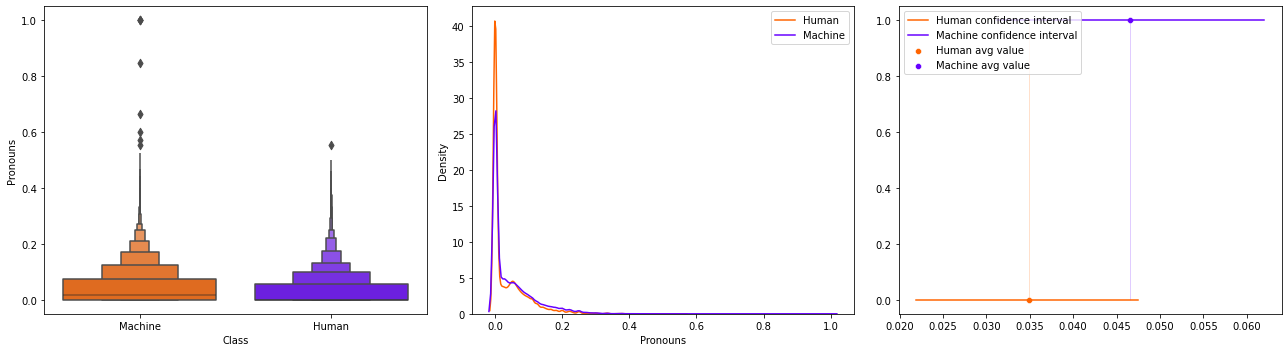

             Mean    Median       Std  Variance
Class                                          
Human    0.034911  0.000000  0.055179  0.003045
Machine  0.046602  0.015748  0.064638  0.004178

T-test:  Found a significant difference in the mean values of "Pronouns", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Pronouns", P-value = 0.000
Spearman correlation:  0.097
_________________________________________________________________________________________________

Analyze feature "RR":


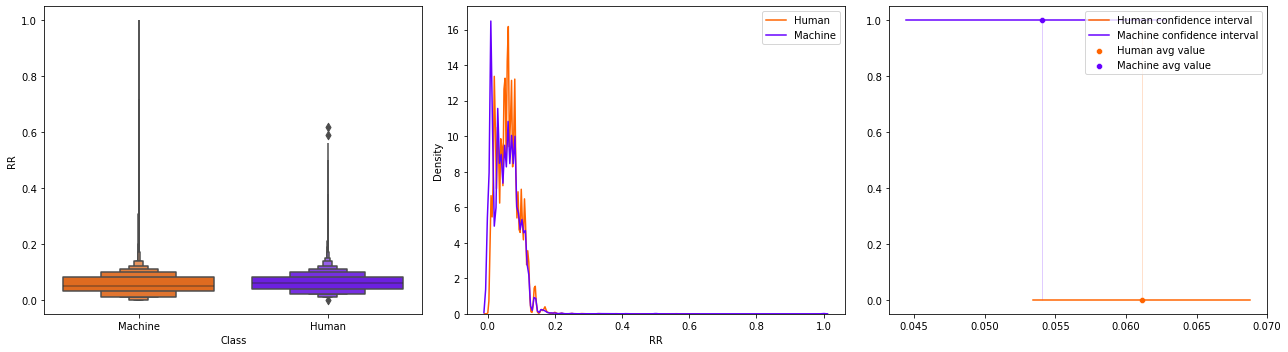

             Mean  Median       Std  Variance
Class                                        
Human    0.061118    0.06  0.033155  0.001099
Machine  0.054096    0.05  0.039998  0.001600

T-test:  Found a significant difference in the mean values of "RR", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "RR", P-value = 0.000
Spearman correlation:  -0.095
_________________________________________________________________________________________________

Analyze feature "Short adjectives":


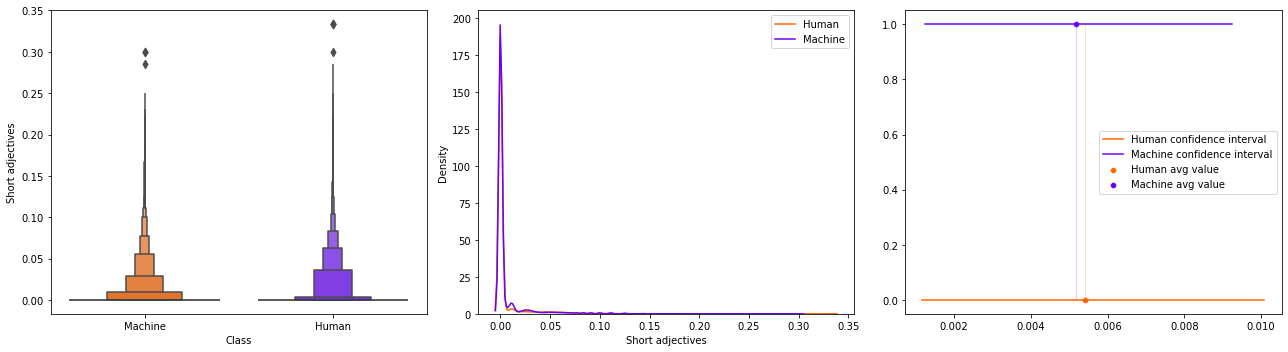

             Mean  Median       Std  Variance
Class                                        
Human    0.005418     0.0  0.019235  0.000370
Machine  0.005173     0.0  0.017476  0.000305

T-test:  Found a significant difference in the mean values of "Short adjectives", P-value = 0.001
Mann-Whitneyu:  Found a significant difference in the mean values of "Short adjectives", P-value = 0.000
Spearman correlation:  -0.007
_________________________________________________________________________________________________

Analyze feature "Short participles":


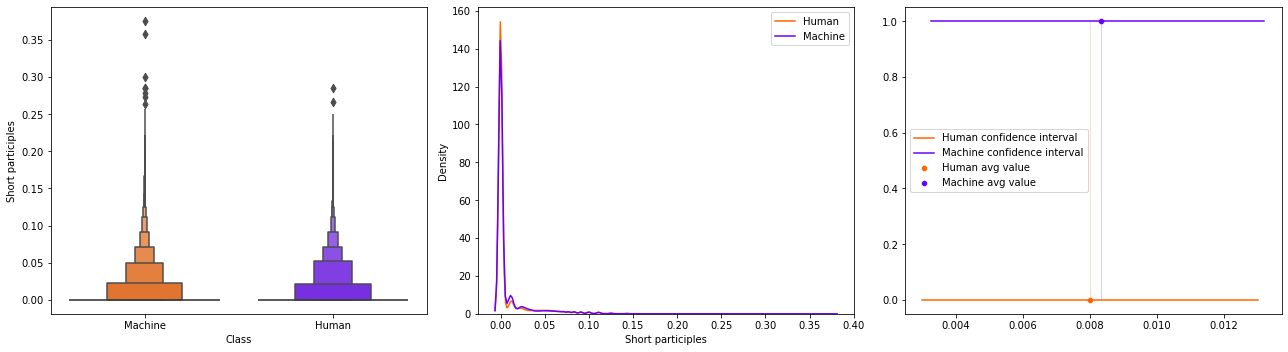

             Mean  Median       Std  Variance
Class                                        
Human    0.007984     0.0  0.021615  0.000467
Machine  0.008327     0.0  0.021757  0.000473

T-test:  Found a significant difference in the mean values of "Short participles", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Short participles", P-value = 0.000
Spearman correlation:  0.008
_________________________________________________________________________________________________

Analyze feature "TTR":


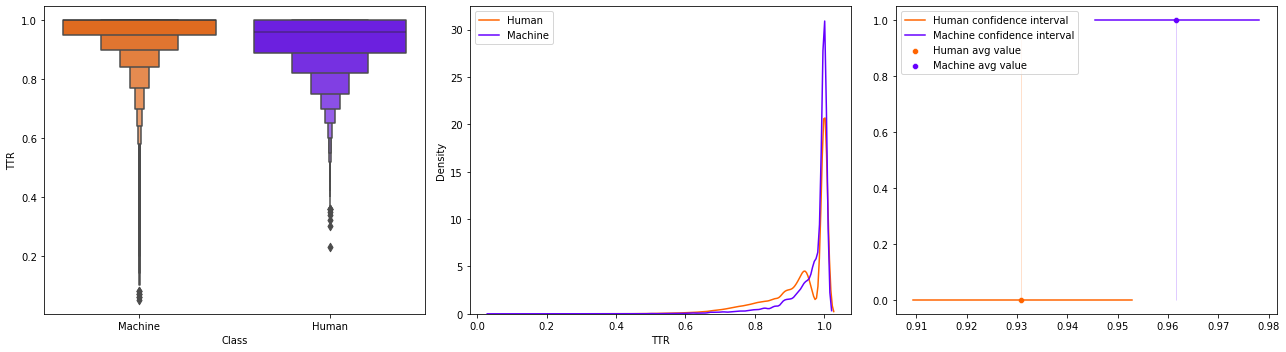

             Mean  Median       Std  Variance
Class                                        
Human    0.930720    0.96  0.093171  0.008681
Machine  0.961536    1.00  0.071774  0.005152

T-test:  Found a significant difference in the mean values of "TTR", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "TTR", P-value = 0.000
Spearman correlation:  0.182
_________________________________________________________________________________________________

Analyze feature "Unknown words":


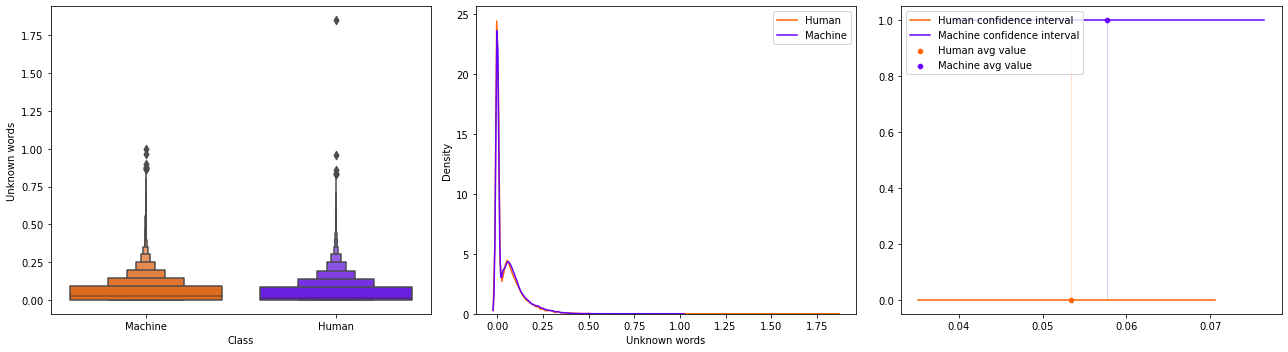

             Mean    Median       Std  Variance
Class                                          
Human    0.053367  0.014085  0.076684  0.005880
Machine  0.057697  0.028302  0.079128  0.006261

T-test:  Found a significant difference in the mean values of "Unknown words", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Unknown words", P-value = 0.000
Spearman correlation:  0.028
_________________________________________________________________________________________________

Analyze feature "Verbs":


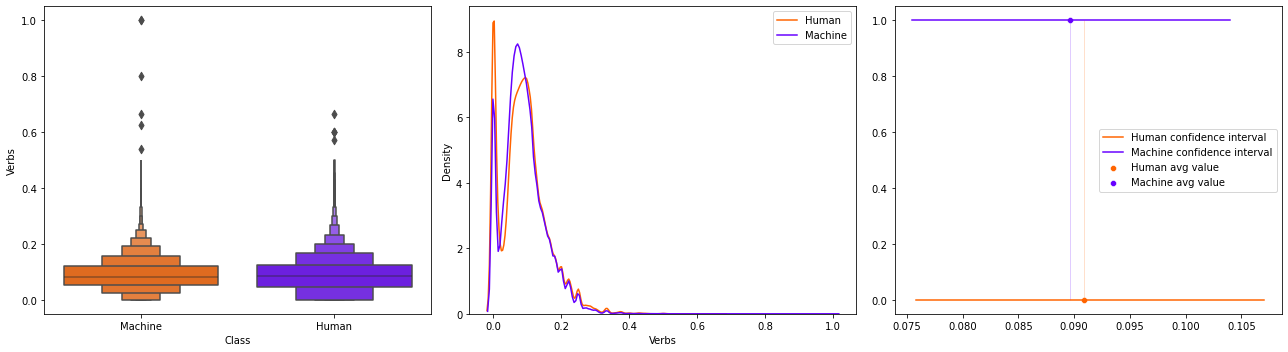

             Mean    Median       Std  Variance
Class                                          
Human    0.090906  0.085714  0.066424  0.004412
Machine  0.089657  0.083333  0.060063  0.003608

T-test:  Found a significant difference in the mean values of "Verbs", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Verbs", P-value = 0.000
Spearman correlation:  -0.01
_________________________________________________________________________________________________

Analyze feature "Whitespace character density":


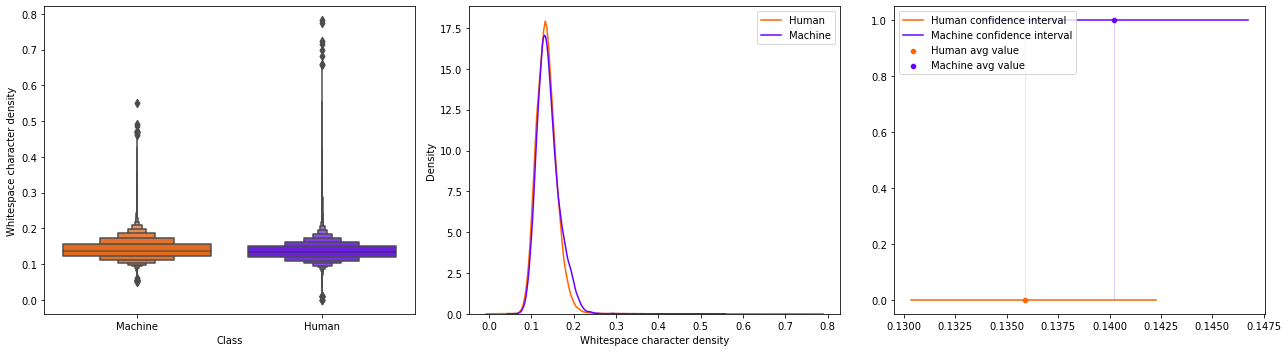

             Mean    Median       Std  Variance
Class                                          
Human    0.135885  0.134199  0.025475  0.000649
Machine  0.140193  0.136364  0.027360  0.000749

T-test:  Found a significant difference in the mean values of "Whitespace character density", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "Whitespace character density", P-value = 0.000
Spearman correlation:  0.081
_________________________________________________________________________________________________

Analyze feature "ipm":


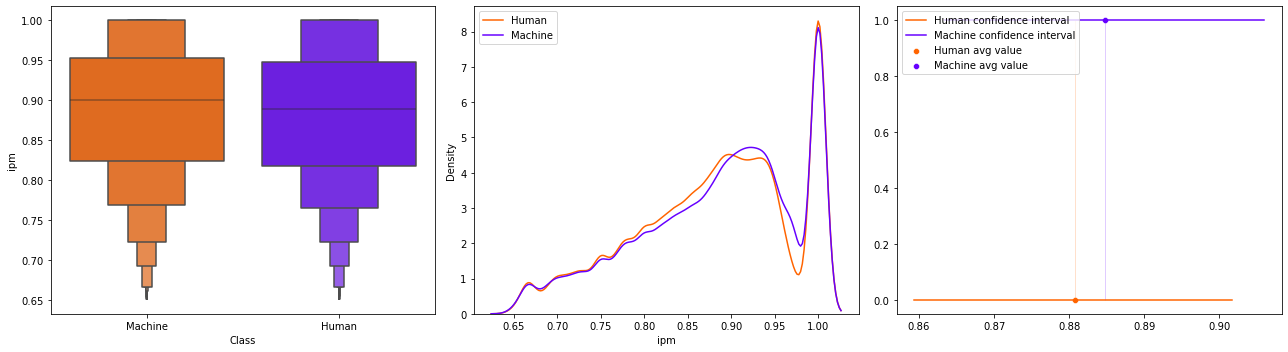

             Mean    Median       Std  Variance
Class                                          
Human    0.880850  0.888889  0.089881  0.008079
Machine  0.884742  0.900000  0.090065  0.008112

T-test:  Found a significant difference in the mean values of "ipm", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "ipm", P-value = 0.000
Spearman correlation:  0.022
_________________________________________________________________________________________________

Analyze feature "len_text_text":


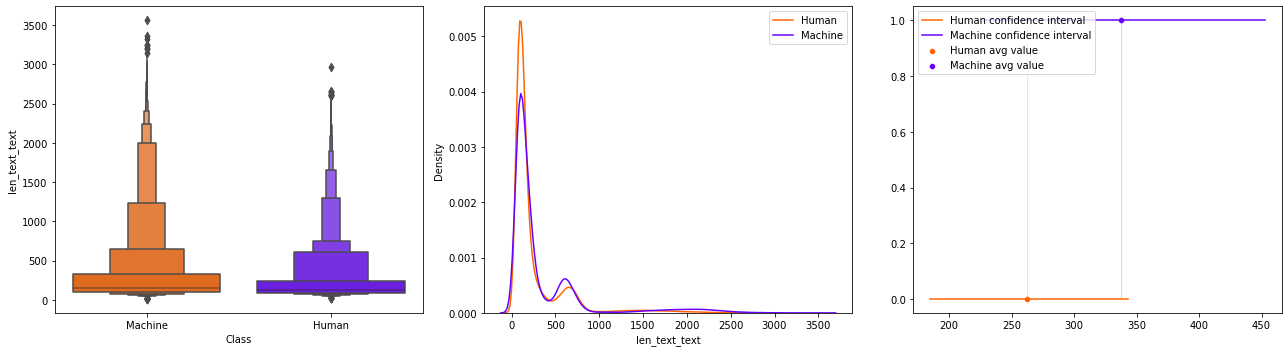

               Mean  Median         Std       Variance
Class                                                 
Human    262.295796   132.0  338.762531  114760.052390
Machine  337.744572   153.0  478.869830  229316.313621

T-test:  Found a significant difference in the mean values of "len_text_text", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "len_text_text", P-value = 0.000
Spearman correlation:  0.091
_________________________________________________________________________________________________

Analyze feature "num_sents":


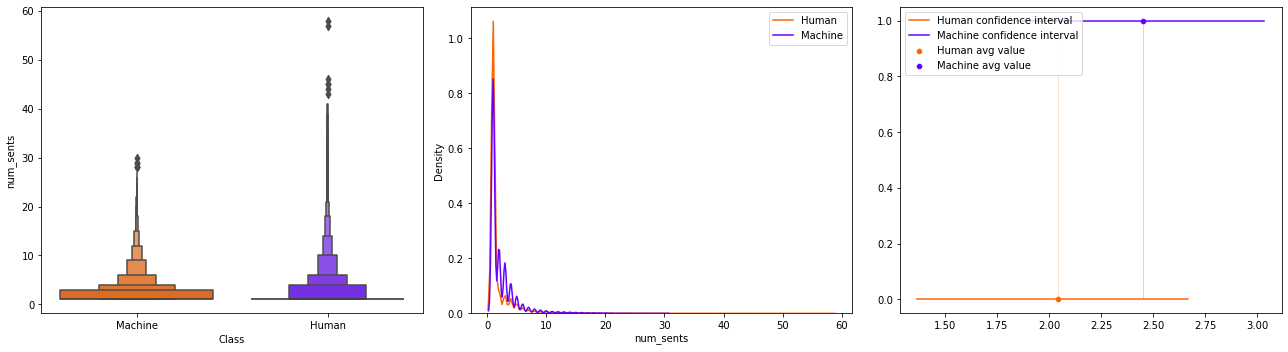

             Mean  Median       Std  Variance
Class                                        
Human    2.043932     1.0  2.960635  8.765362
Machine  2.448677     1.0  2.626393  6.897941

T-test:  Found a significant difference in the mean values of "num_sents", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "num_sents", P-value = 0.000
Spearman correlation:  0.072
_________________________________________________________________________________________________

Analyze feature "num_tokens":


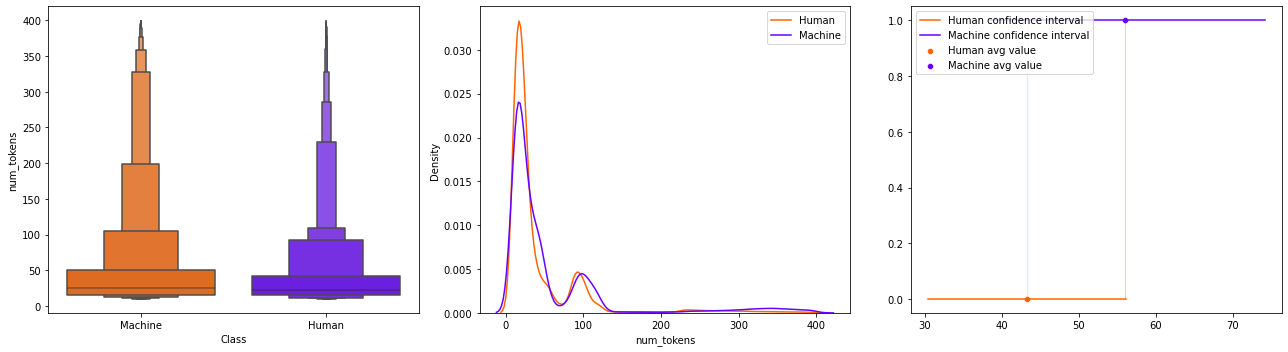

              Mean  Median        Std     Variance
Class                                             
Human    43.304162    22.0  56.220465  3160.740634
Machine  55.973572    26.0  76.137573  5796.930070

T-test:  Found a significant difference in the mean values of "num_tokens", P-value = 0.000
Mann-Whitneyu:  Found a significant difference in the mean values of "num_tokens", P-value = 0.000
Spearman correlation:  0.094
_________________________________________________________________________________________________



In [13]:
for col in list(df):
    if is_numeric_dtype(df[col]):
        print(f'Analyze feature "{col}":')
        analyze_feature(df, col)
        print('_________________________________________________________________________________________________')
        print('')

In [14]:
test_cols = [col for col in list(df) if col not in ['POS_Text', 'Text', 'Class_multi', 'Class_binary']]

In [15]:
df['Class']

0         Machine
1           Human
2         Machine
3         Machine
4         Machine
           ...   
246472    Machine
246473      Human
246474      Human
246475    Machine
246476      Human
Name: Class, Length: 246477, dtype: object

In [16]:
def ttest(df, col):
    stat, pvalue = stats.ttest_ind(df[df['Class'] == 'Human'][col], df[df['Class'] == 'Machine'][col])
    if pvalue > 0.05:
        return 0, (stat, pvalue)
    else:
        return 1, (stat, pvalue)
    
def mman(df, col):
    stat, pvalue = stats.mannwhitneyu(df[df['Class'] == 'Human'][col], df[df['Class'] == 'Machine'][col])
    if pvalue > 0.05:
        return 0, (stat, pvalue)
    else:
        return 1, (stat, pvalue)

In [17]:
tests = []

for col in test_cols:
    if is_numeric_dtype(df[col]):
        res_ttest, (stat_ttest, pvalue_ttest) = ttest(df, col)
        res_mman, (stat_mman, pvalue_mman) = mman(df, col)
        tests.append([col, res_ttest, stat_ttest, pvalue_ttest, res_mman, stat_mman, pvalue_mman])

In [18]:
tests_df = pd.DataFrame(tests, columns=['Feature', 'Ttest', 'Stat_ttest', 'Pval_ttest', 'Mman', 'Stat_mman', 'Pval_mman'])

In [19]:
tests_df['Stat_ttest'] = tests_df['Stat_ttest'].apply(lambda x: round(x, 2))
tests_df['Pval_ttest'] = tests_df['Pval_ttest'].apply(lambda x: round(x, 2))
tests_df['Stat_mman'] = tests_df['Stat_mman'].apply(lambda x: round(x, 2))
tests_df['Pval_mman'] = tests_df['Pval_mman'].apply(lambda x: round(x, 2))

In [116]:
tests_df.iloc[(tests_df['Feature'] == 'Id').index, [0, 1, 4, 3, -1]].to_csv('../tests.csv', index=False)

In [20]:
tests_df['Ttest'].value_counts()

1    62
0     2
Name: Ttest, dtype: int64

In [21]:
tests_df['Mman'].value_counts()

1    62
0     2
Name: Mman, dtype: int64

In [22]:
tests_df[tests_df['Mman'] == 0]

Feature  Ttest  Stat_ttest  Pval_ttest  Mman     Stat_mman  \
2   Adverbial participle      1       14.19         0.0     0  7.605754e+09   
45              Numerals      1        4.62         0.0     0  7.582987e+09   

    Pval_mman  
2        0.47  
45       0.25

In [49]:
tests_df[tests_df['Ttest'] == 0]

Feature  Ttest  Stat_ttest  \
26  Frequency (according to Sharov's dictionary)      0        0.75   
49                     Prepositional case (Noun)      0       -1.30   

    Pval_ttest  Mman     Stat_mman  Pval_mman  
26        0.45     1  7.827587e+09        0.0  
49        0.19     1  6.859457e+09        0.0

In [25]:
df_class_vec = df.copy()
df_class_vec['Class'] = df_class_vec['Class'].map({'Human': 0, 'Machine': 1})

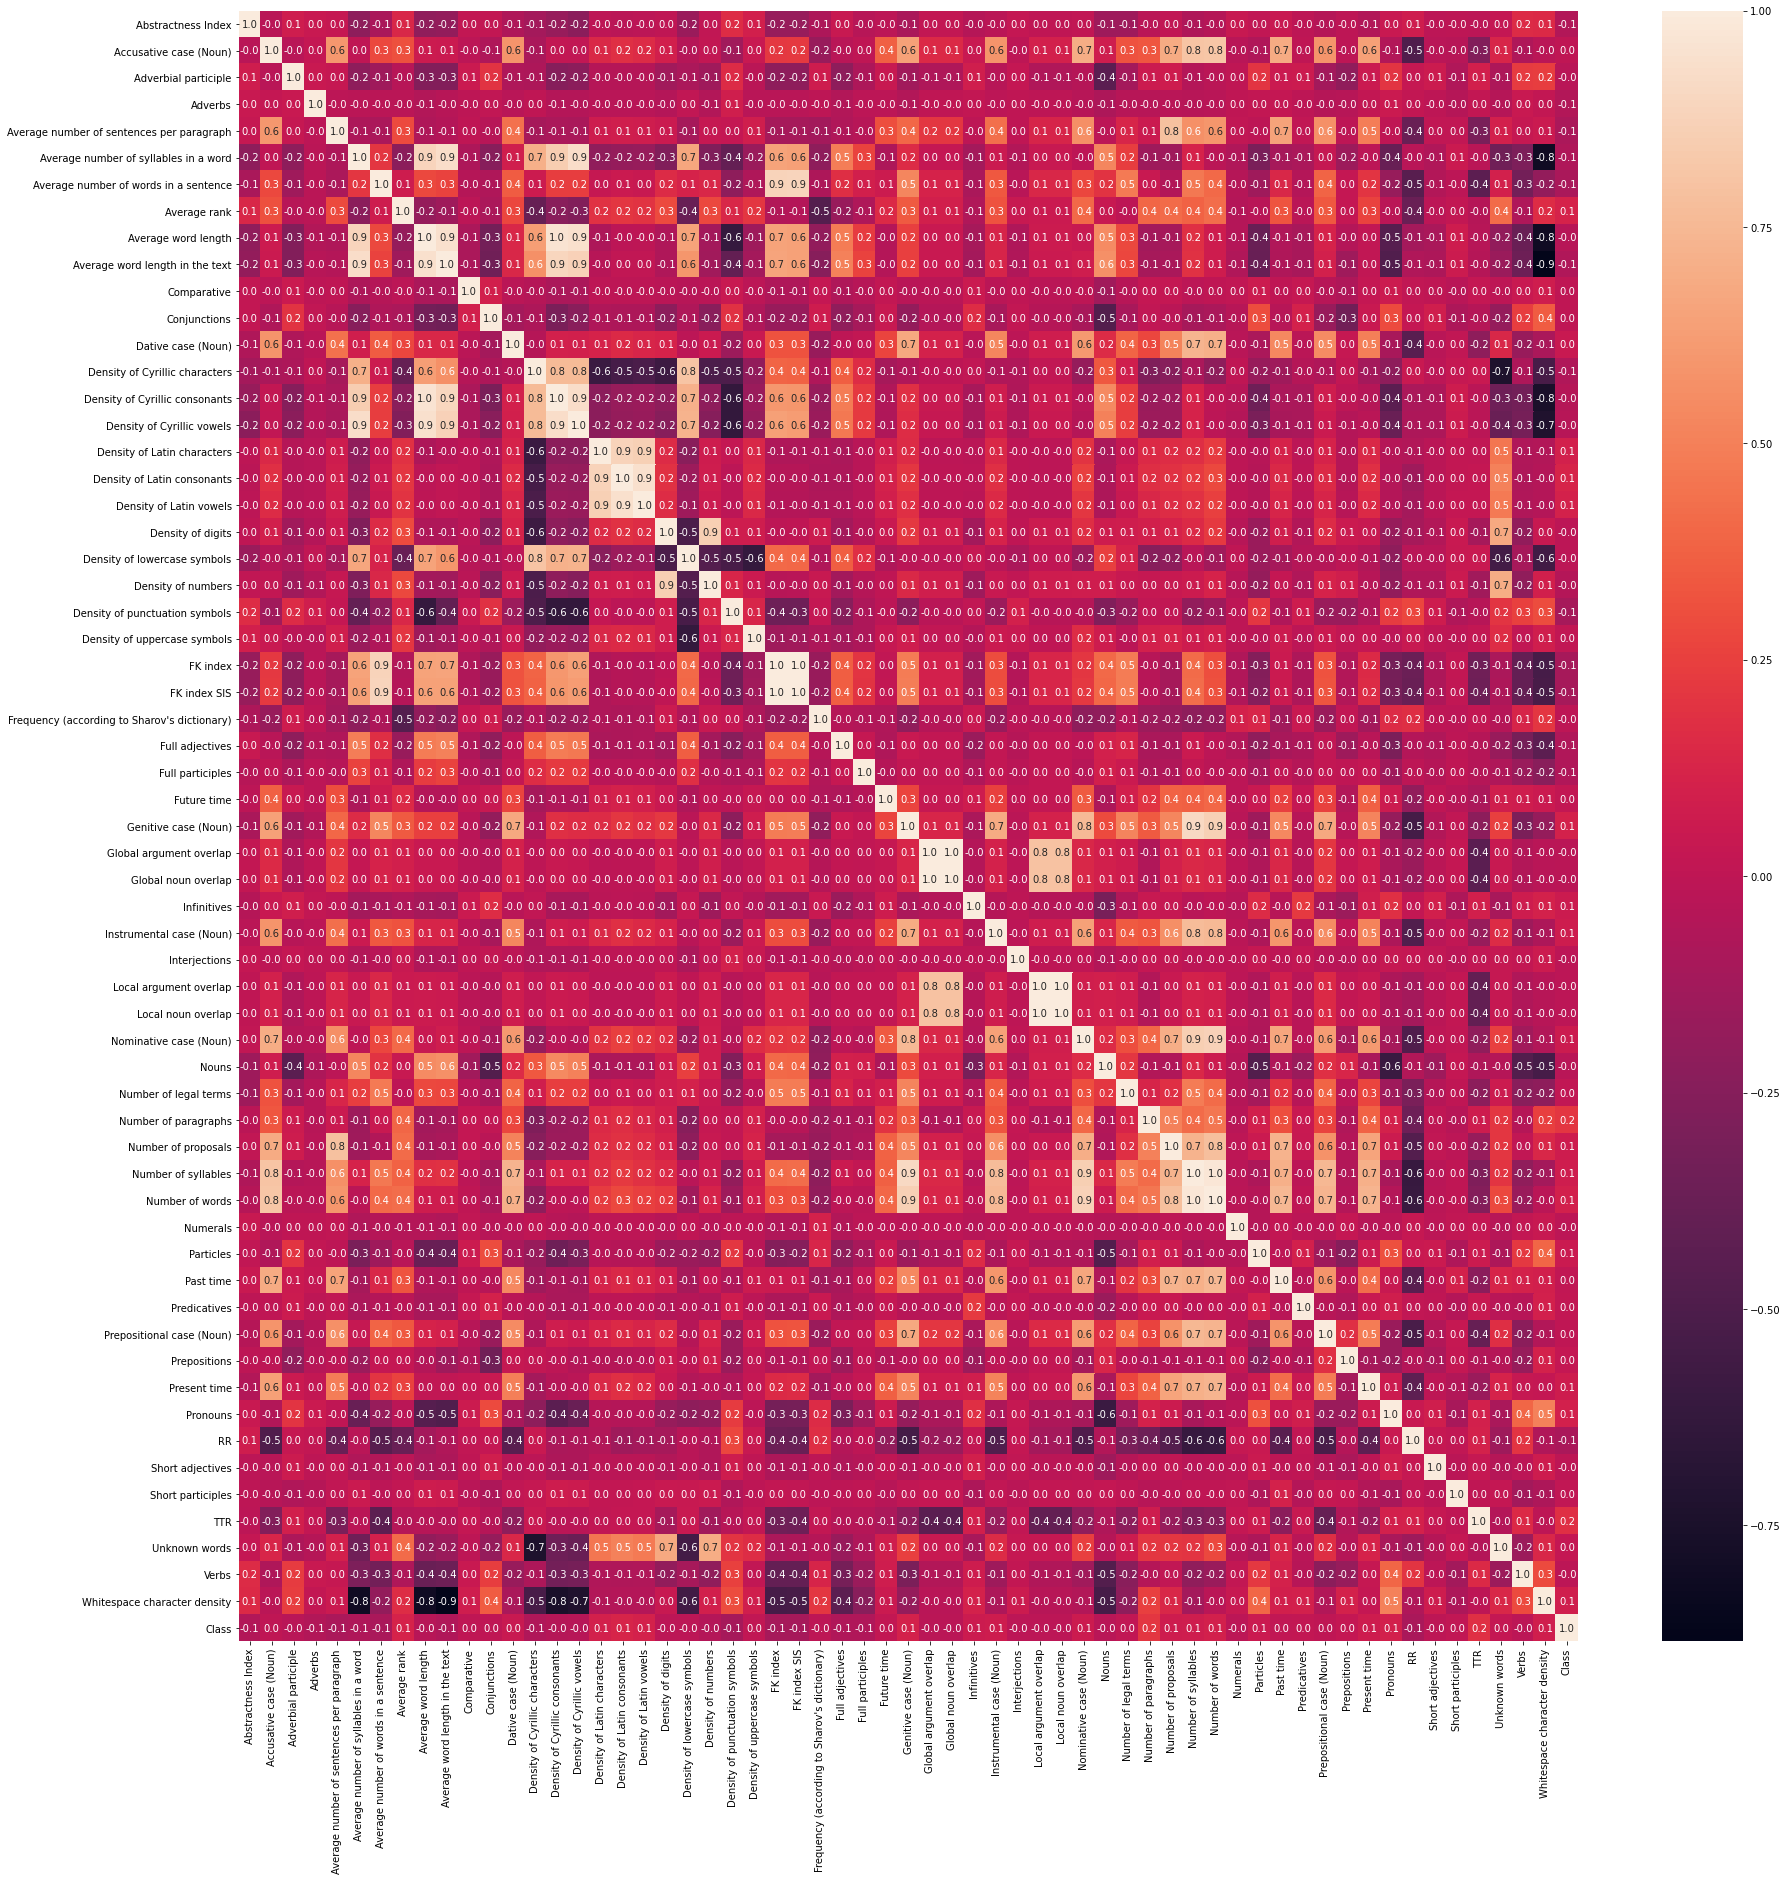

In [35]:
plt.figure(figsize=(30, 30))
inc_cols = [col for col in list(df_class_vec) if '_text' not in col and 'Id' not in col and '_' not in col and col != 'ipm']
sns.heatmap(df_class_vec[inc_cols].corr(), annot=True, fmt='.1f')
plt.show()

Корреляция по Пирсону:

- у RR и TTR высокая корреляция практически со всеми фичами у Н (у М есть корреляция RR и многих фичей, но менее ярко выражена)

RR=(1/(corpora_size*corpora_size))*frequency_squares

TTR=len(freqs)/corpora_size

- у unique tokens высокая корреляция с др. фичами: prep, adjf,noun, none, len_text, ср. колво слов в предложении, предложный падеж,родительный, TTR, индекс ФК (мод), индекс ФК (О), существительные, прилагательные, колво слов, слогов (у М корреляция слабая)

- count_kirr и count_space - корреляция выше у М

- count_lat и mean_en_vowel_occurrence, mean_en_consonant_occurrence - корреляция выше у М

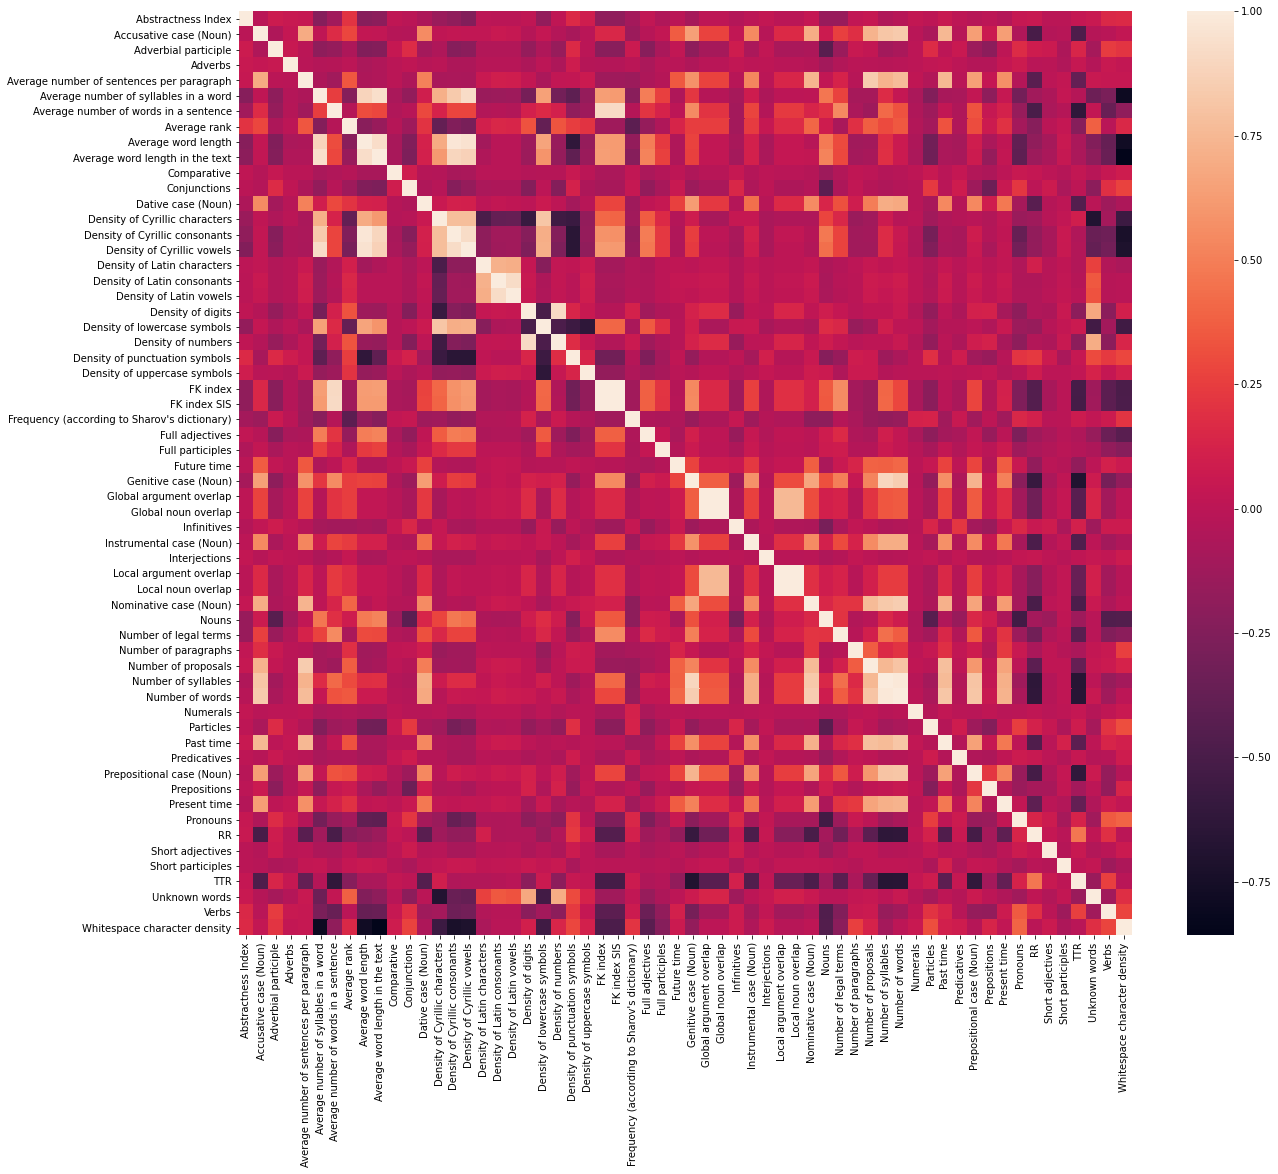

In [37]:
plt.figure(figsize=(20, 17))
sns.heatmap(df[inc_cols][df['Class'] == 'Human'].corr())
plt.show()

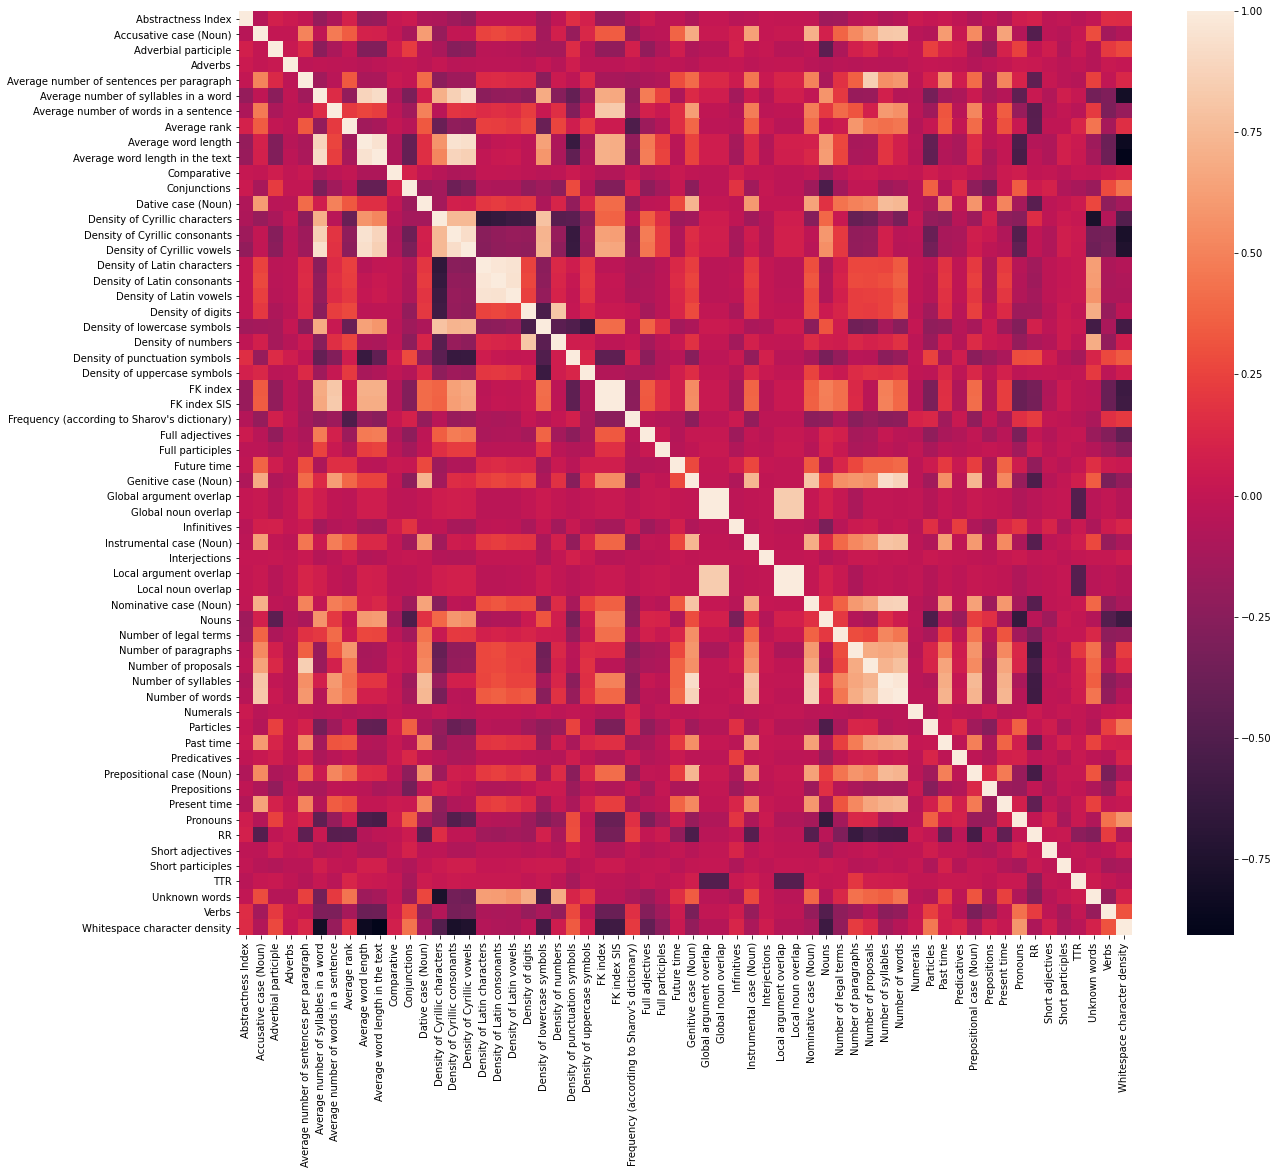

In [38]:
plt.figure(figsize=(20, 17))
sns.heatmap(df[inc_cols][df['Class'] == 'Machine'].corr())
plt.show()

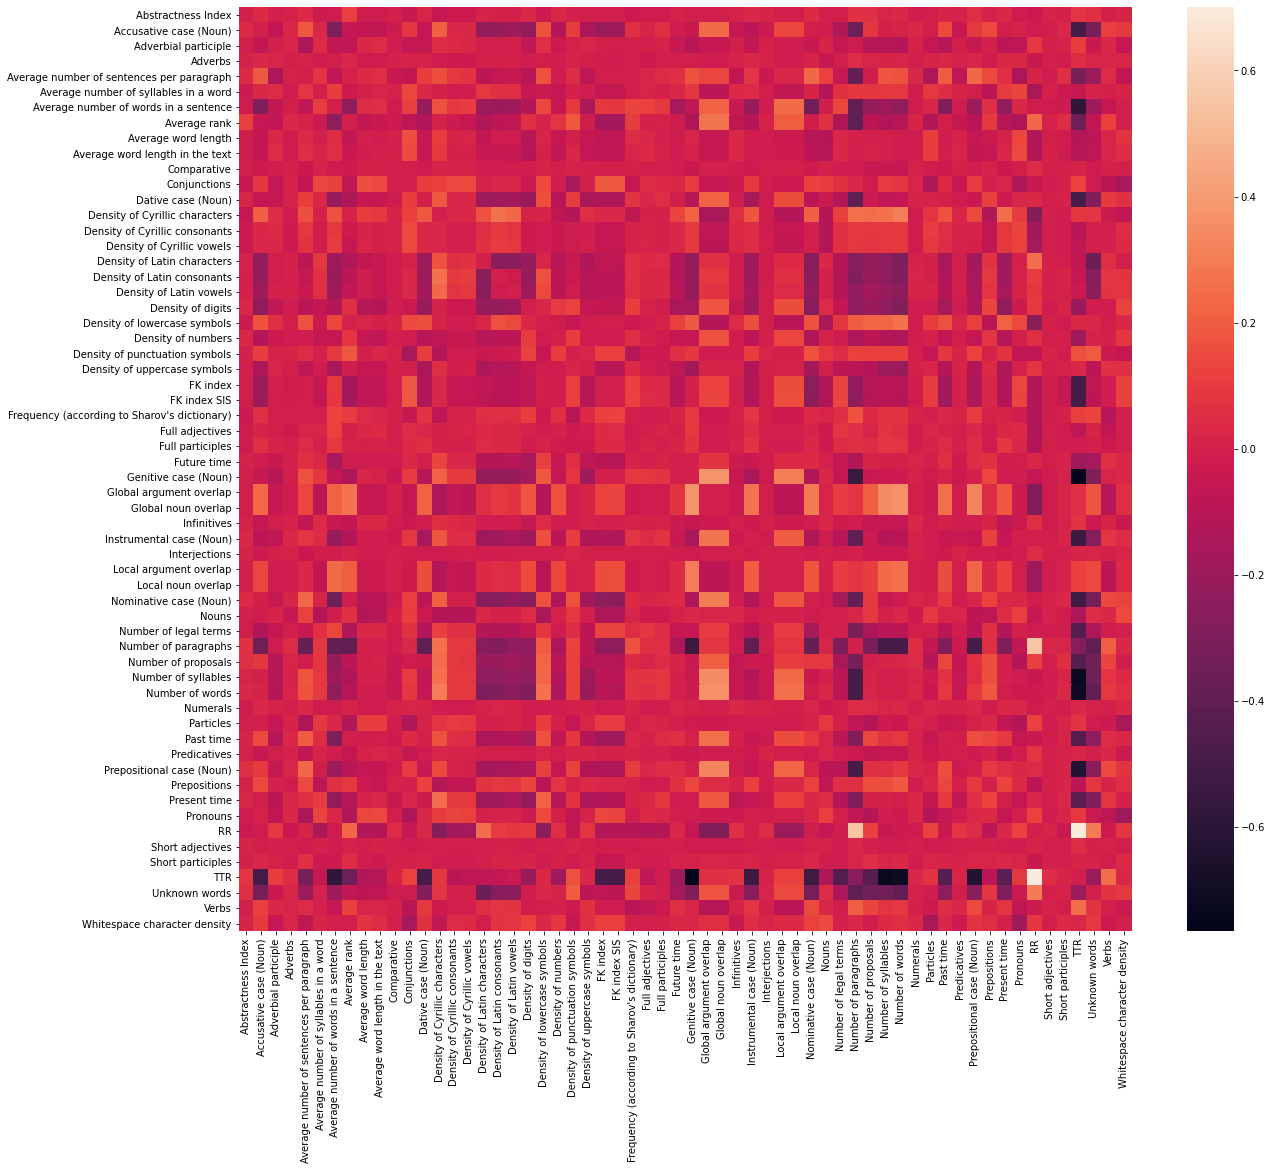

In [39]:
plt.figure(figsize=(20, 17))
sns.heatmap(df[inc_cols][df['Class'] == 'Human'].corr() - df[inc_cols][df['Class'] == 'Machine'].corr())
plt.show()

Корреляция по Кендаллу:
- тоже прослеживается высокая корреляция между RR TTR и практически всеми фичами (у Н сильнее)
- у Н более сильная корреляция между фичами local noun overap, global noun overlap, local argument overlap, global argument overlap (критерий связности в суммаризаторах) и всеми, кроме ср. количества слогов в слове, частотности Шарова, индекса абстрактности, средней длины слова, count_punct, count_uppercase, count_loercase, avd_word_len, mean_ru_vowel_occurance, mean_ru_consonant_occurance, count_kirr

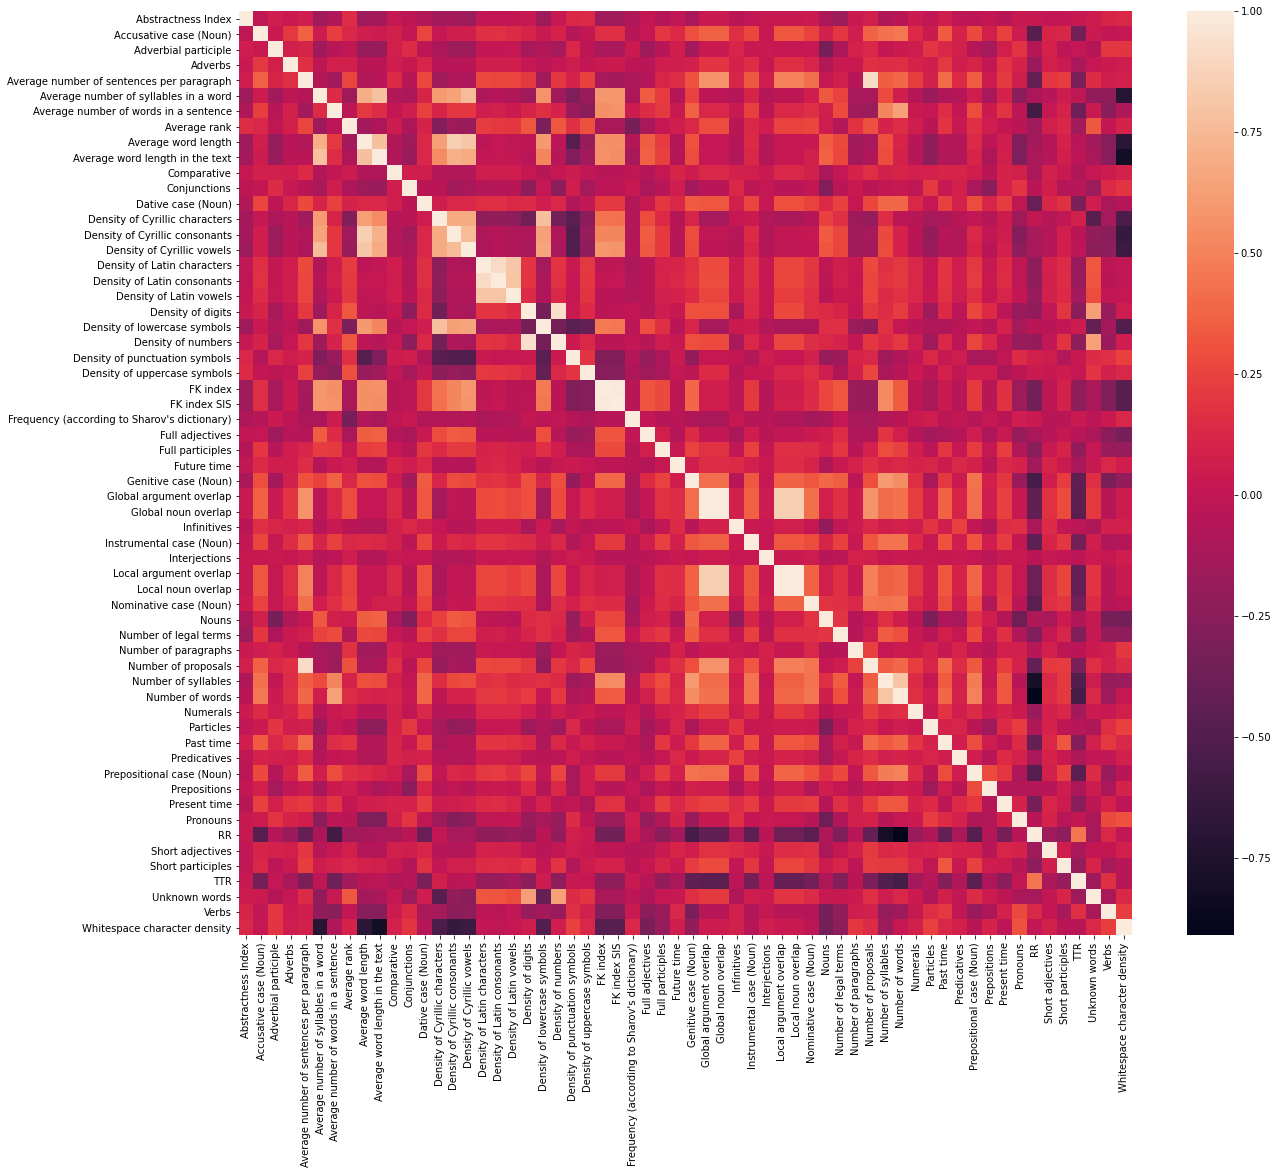

In [40]:
plt.figure(figsize=(20, 17))
sns.heatmap(df[inc_cols][df['Class'] == 'Human'].corr(method='kendall'))
plt.show()

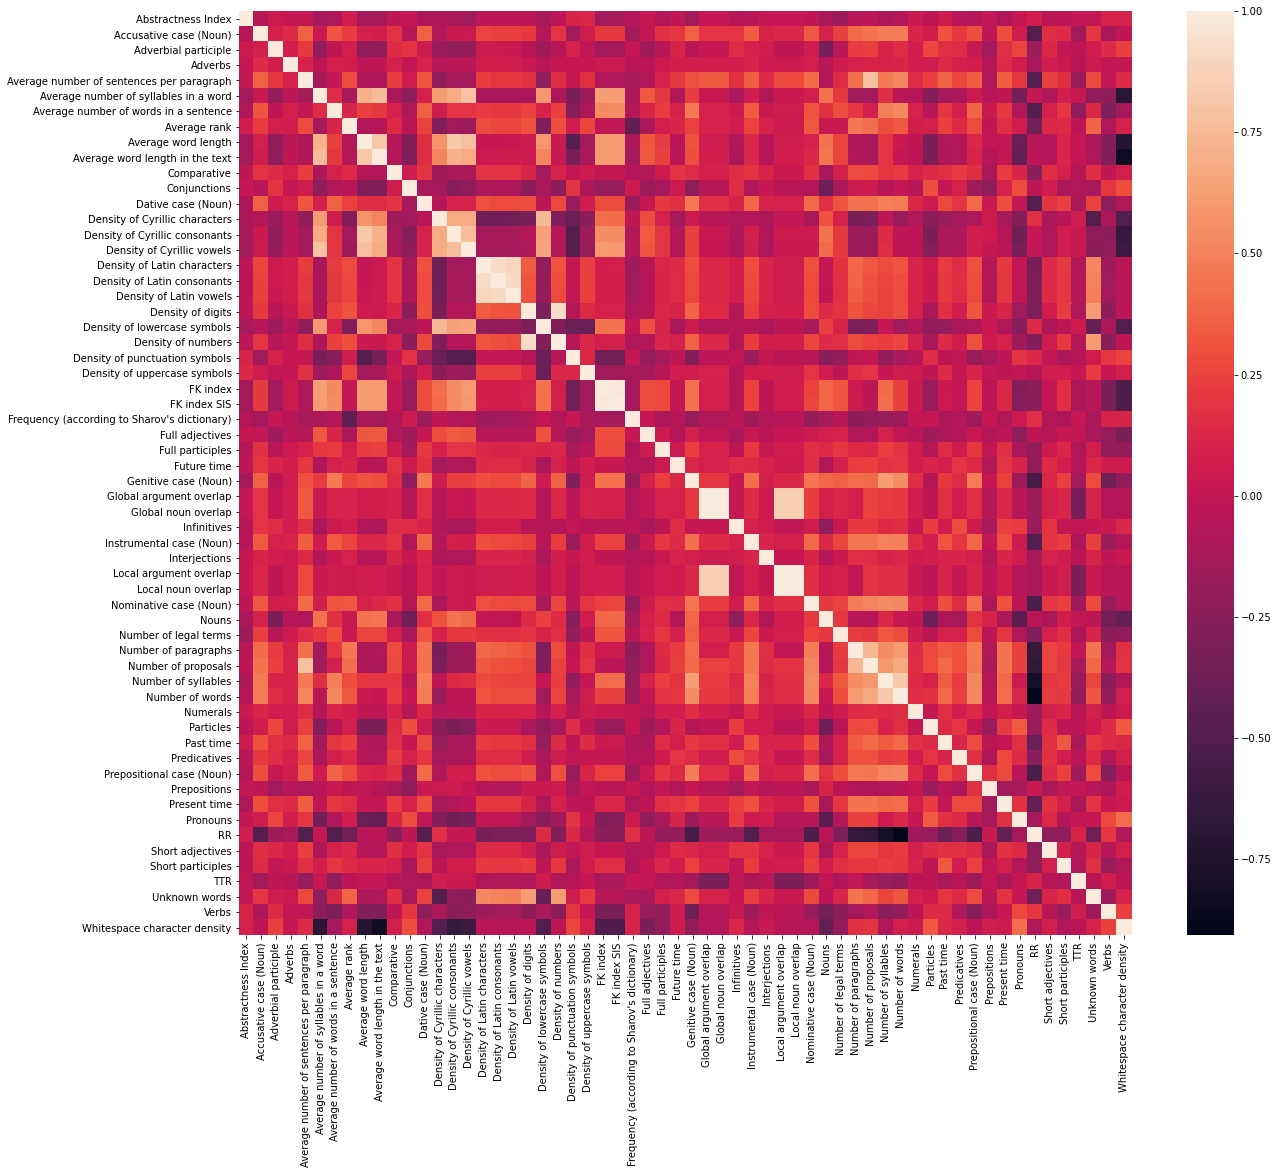

In [41]:
plt.figure(figsize=(20, 17))
sns.heatmap(df[inc_cols][df['Class'] == 'Machine'].corr(method='kendall'))
plt.show()

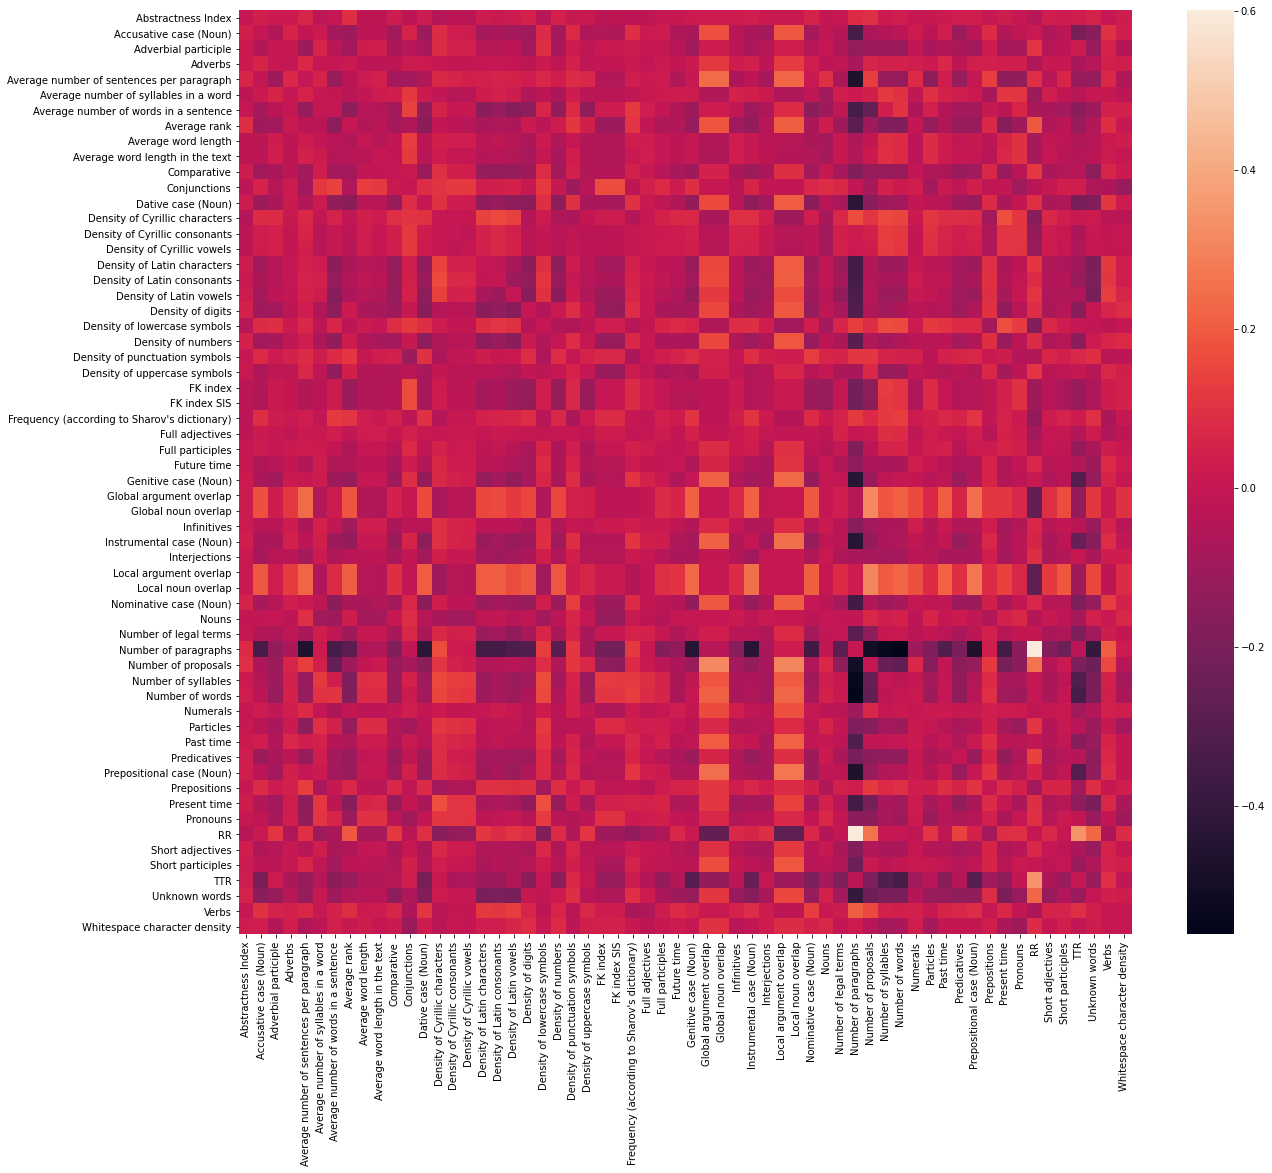

In [42]:
plt.figure(figsize=(20, 17))
sns.heatmap(df[inc_cols][df['Class'] == 'Human'].corr(method='kendall') - df[inc_cols][df['Class'] == 'Machine'].corr(method='kendall'))
plt.show()

In [43]:
(df[inc_cols][df['Class'] == 'Human'].corr(method='kendall') - df[inc_cols][df['Class'] == 'Machine'].corr(method='kendall')).mean(axis=1).sort_values(ascending=False).head(30)

Local argument overlap                          0.081518
Local noun overlap                              0.081518
Global argument overlap                         0.067815
Global noun overlap                             0.067815
Verbs                                           0.040284
Density of punctuation symbols                  0.034857
Prepositions                                    0.034852
Density of Cyrillic characters                  0.034444
Frequency (according to Sharov's dictionary)    0.033541
Density of lowercase symbols                    0.031397
Conjunctions                                    0.023593
Adverbs                                         0.016231
Abstractness Index                              0.014232
Density of Cyrillic consonants                  0.013611
RR                                              0.012419
Density of Cyrillic vowels                      0.011268
Numerals                                        0.010659
Whitespace character density   

In [44]:
(df[inc_cols][df['Class'] == 'Human'].corr(method='kendall') - df[inc_cols][df['Class'] == 'Machine'].corr(method='kendall')).mean(axis=1).sort_values(ascending=False).tail(30)

Number of words                         -0.016062
Future time                             -0.016786
Number of syllables                     -0.017218
Prepositional case (Noun)               -0.017238
Accusative case (Noun)                  -0.017944
Short adjectives                        -0.018097
Density of Latin consonants             -0.018600
Density of uppercase symbols            -0.019672
Present time                            -0.022328
Genitive case (Noun)                    -0.022891
Adverbial participle                    -0.023511
Instrumental case (Noun)                -0.024474
FK index                                -0.024489
Number of legal terms                   -0.024761
FK index SIS                            -0.025218
Number of proposals                     -0.028264
Density of Latin characters             -0.028582
Nominative case (Noun)                  -0.030418
Density of Latin vowels                 -0.032166
Density of numbers                      -0.032875


Корреляция по Спирману:

- в отличие от М у Н есть корреляция между количеством абзацев и POS-тегами + падежными фичами

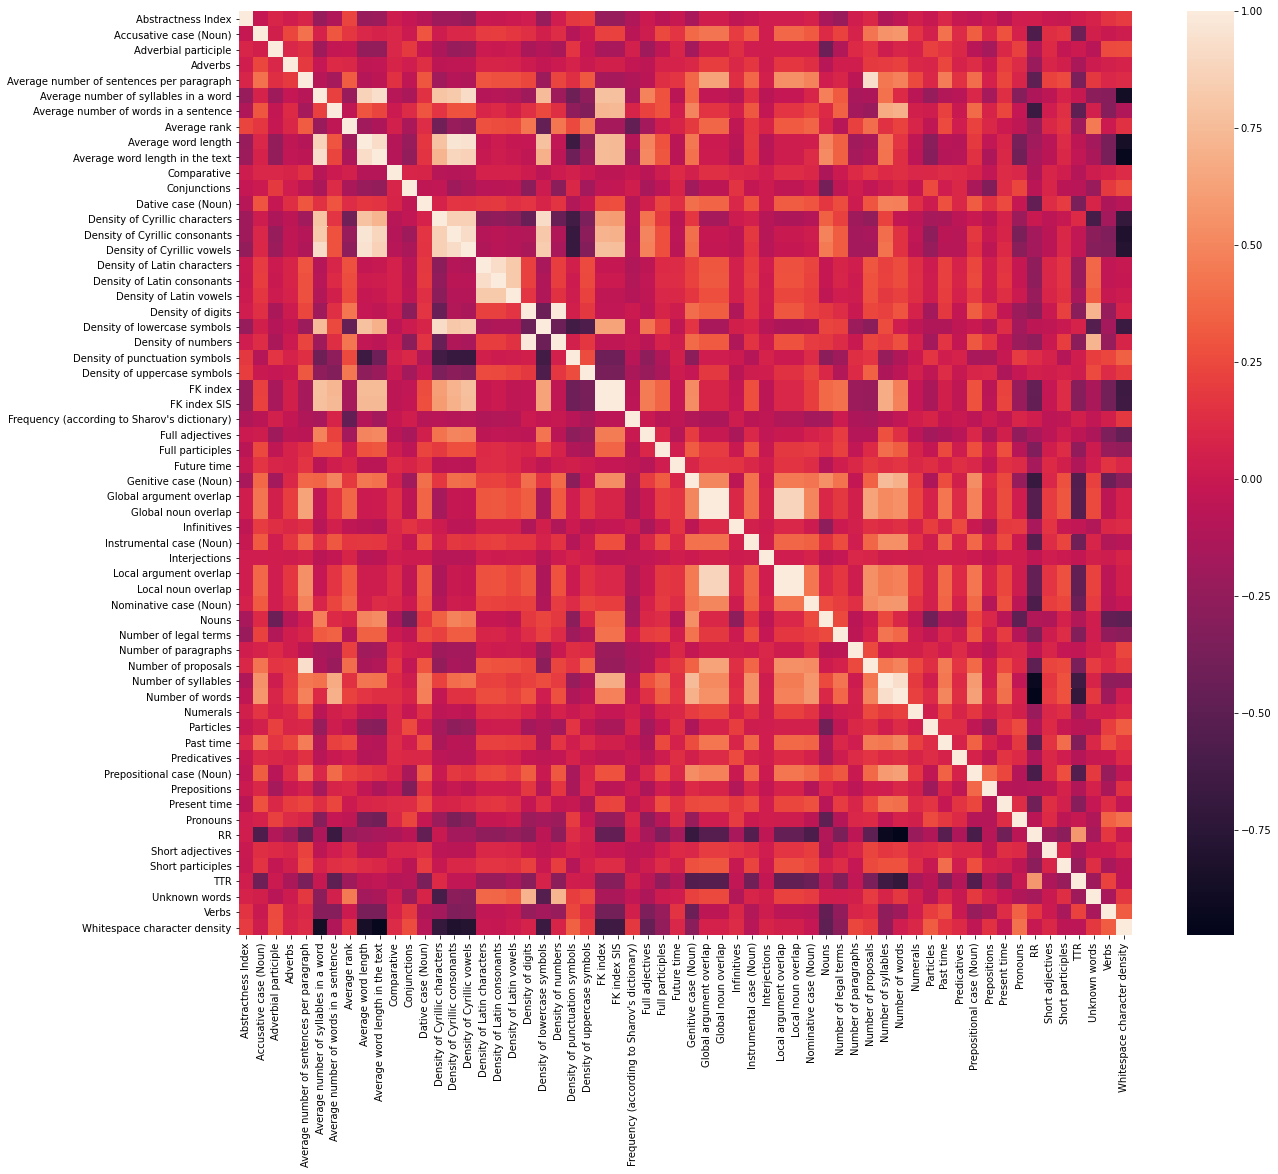

In [45]:
plt.figure(figsize=(20, 17))
sns.heatmap(df[inc_cols][df['Class'] == 'Human'].corr(method='spearman'))
plt.show()

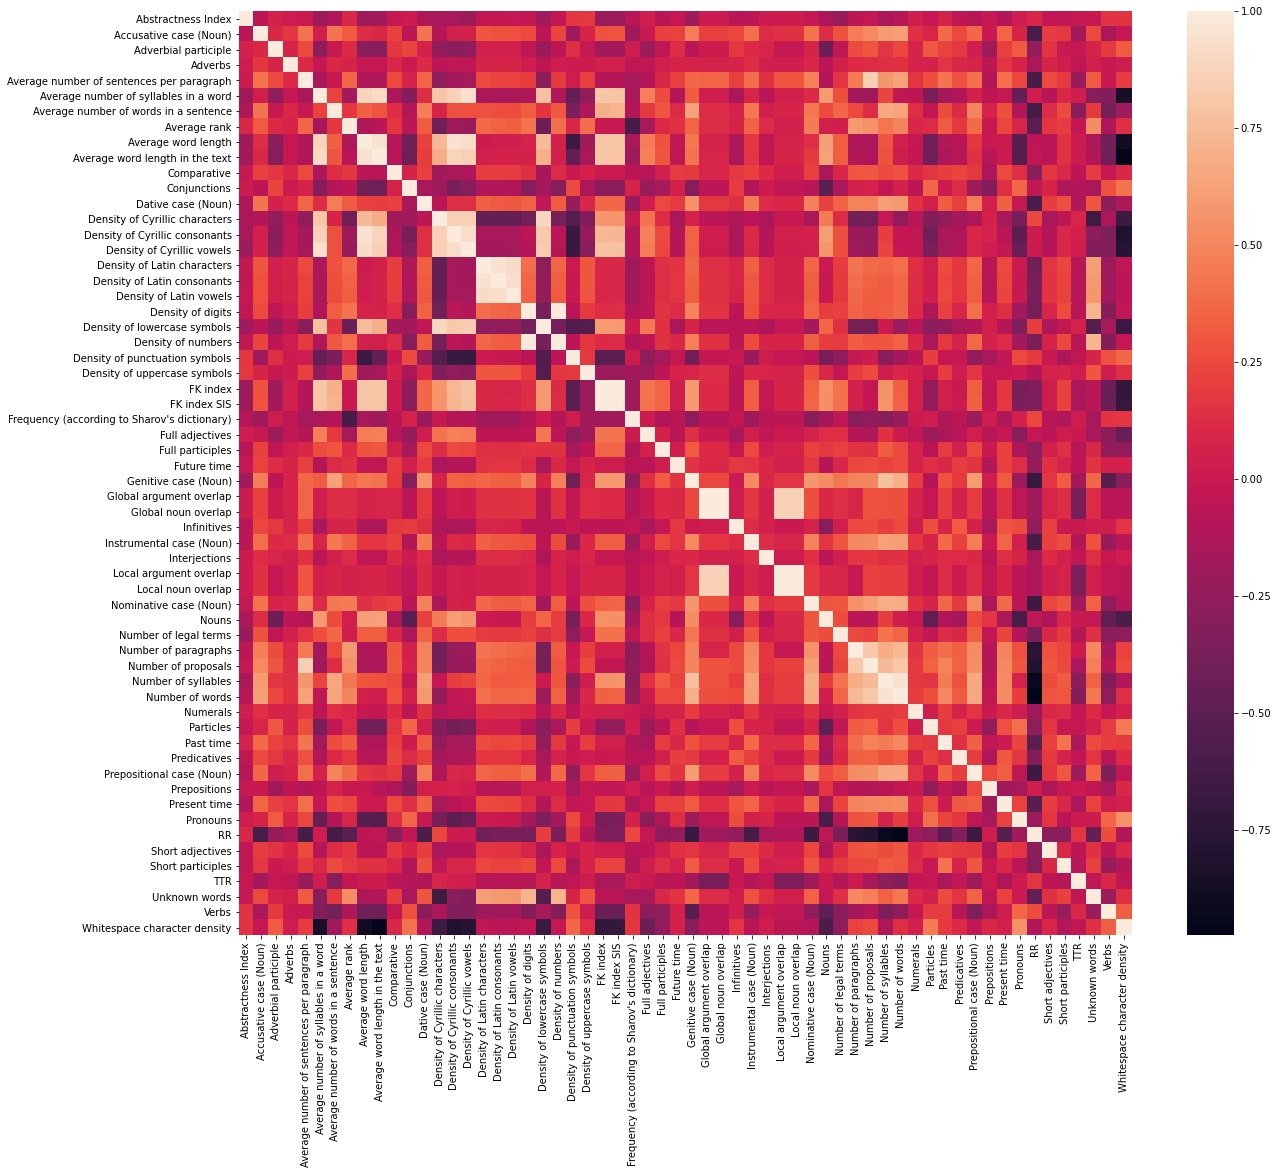

In [46]:
plt.figure(figsize=(20, 17))
sns.heatmap(df[inc_cols][df['Class'] == 'Machine'].corr(method='spearman'))
plt.show()

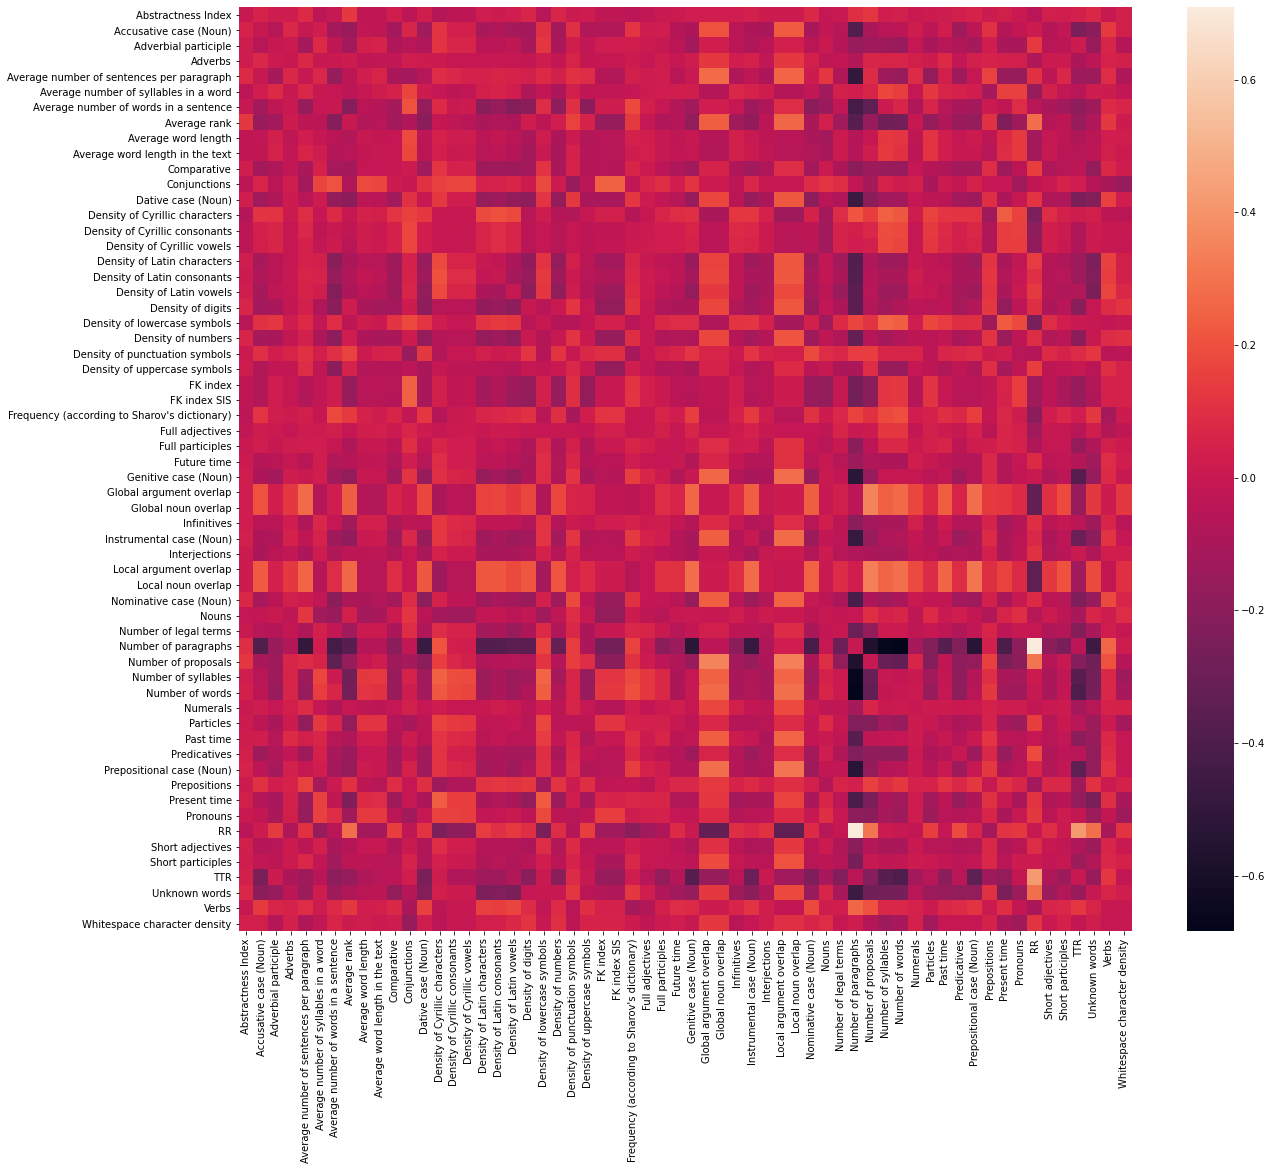

In [47]:
plt.figure(figsize=(20, 17))
sns.heatmap(df[inc_cols][df['Class'] == 'Human'].corr(method='spearman') - df[inc_cols][df['Class'] == 'Machine'].corr(method='spearman'))
plt.show()